<a name = "inicio"></a>

1. [Introducción](#Introducción)
1. [Base teórica](#Base-teórica)
    1. [Carga y transformación de datos](#Carga-y-transformación-de-datos)
    1. [Tipos de datos temporales en pandas](#Tipos-de-datos-temporales-en-pandas)
    1. [Herramientas de pandas](#Herramientas-de-pandas)
        1. [Remuestreado](#Remuestreado)
        1. [Interpolado](#Interpolado)
        1. [Truncado](#Truncado)
        1. [Desplazamientos](#Desplazamientos)
        1. [Diferencias](#Diferencias)
    1. [Conceptos matemáticos](#Conceptos-matemáticos)
        1. [Correlación](#Correlación)
        1. [Autocorrelación](#Autocorrelación)
        1. [La función de autocorrelación (ACF)](#La-función-de-autocorrelación-(ACF))
        1. [La función de autocorrelación parcial (PACF)](#La-función-de-autocorrelación-parcial-(PACF))
        1. [Ruido blanco](#Ruido-blanco)
1. [Modelos ARIMA](#Modelos-ARIMA)
    1. [El modelo Autorregresivo (AR)](#El-modelo-Autorregresivo-(AR))
        1. [AIC y BIC](#AIC-y-BIC)
        1. [Predicción](#Predicción)
    1. [El modelo Moving Average (MA)](#El-modelo-Moving-Average-(MA))
    1. [El modelo ARMA](#El-modelo-ARMA)
    1. [Series estacionarias (stationary series)](#Series-estacionarias-(stationary-series))
        1. [El test de Dicky-Fuller Aumentado](#El-test-de-Dicky-Fuller-Aumentado)
        1. [Transformaciones](#Transformaciones)
        1. [Integración](#Integración)
    1. [Perfiles de los datos AR y MA](#Perfiles-de-los-datos-AR-y-MA)
        1. [Datos AR](#Datos-AR)
        1. [Datos MA](#Datos-MA)
    1. [El modelo ARIMA](#El-modelo-ARIMA)
    1. [Búsqueda en bucle del mejor modelo](#Búsqueda-en-bucle-del-mejor-modelo)
    1. [Descomposición de una serie estacional](#Descomposición-de-una-serie-estacional)
    1. [El modelo SARIMA](#El-modelo-SARIMA)
    1. [Diagnóstico del modelo](#Diagnóstico-del-modelo)
    1. [Automatización del cálculo de los órdenes óptimos](#Automatización-del-cálculo-de-los-órdenes-óptimos)
    1. [El modelo ARIMAX](#El-modelo-ARIMAX)

# Introducción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Antes de comenzar, una obviedad: series temporales son aquellos conjuntos de datos que tienen una fecha asociada. Por ejemplo, el famoso dataset Iris conteniendo información sobre el largo y ancho de pétales y sépalos de flores Iris no incluye campos temporales, en principio porque todas las flores fueron recogidas en un período de tiempo muy breve, y el momento exacto de la recogida, por supuesto, no influía en las dimensiones de la planta.

Sin embargo, si estuviésemos analizando la evolución de estas plantas a lo largo de los años, sí sería necesario registrar, junto a las dimensiones de pétalos y sépalos, cuándo se recogió cada especimen.

Las series temporales son usadas en multitud de campos de estudio, generándose multitud de datasets para los que querríamos predecir el futuro. Por ejemplo, cualquier sensor envía, junto al dato que esté midiendo, información de la fecha y hora a la que se recoge el dato. Así, un sensor que mide la temperatura de un motor está donde está para permitirnos prever problemas antes de que ocurran. Además, a medida que el concepto de "Internet de las cosas" se va asentando, cada vez son más y más los sistemas que, conectados a internet, generan datos que tienen asociados una marca de tiempo.

Los ejemplos que podemos poner son casi innumerables:

La temperatura global media del planeta:

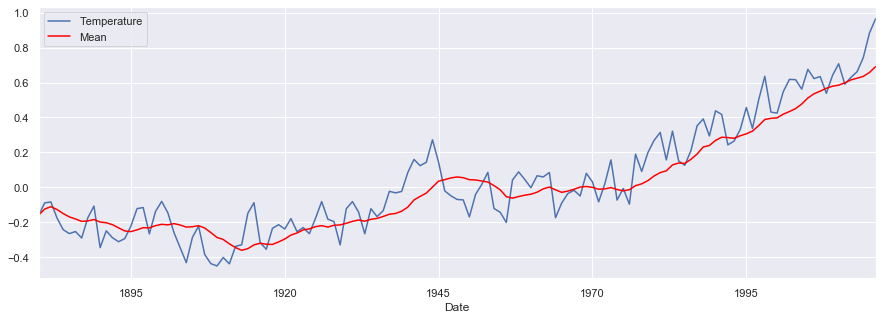

...evolución del valor de acciones bursátiles...

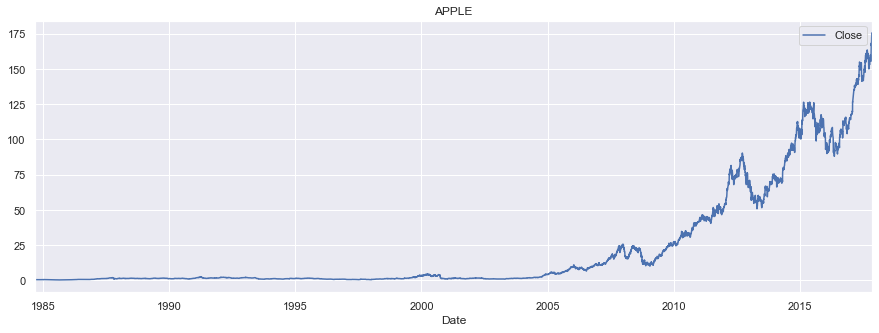

...número de personas transportadas vía aérea por mes...

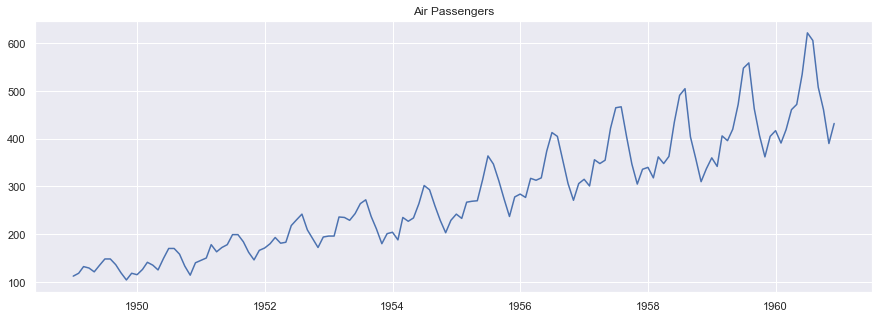

...demanda de energía, de venta de productos, evolución de variables relacionadas con la salud debido, por ejemplo, al creciente sedentarismo, tamaño de los polos de la Tierra, evolución del clima, tamaño de la población de una ciudad o de un país...

Una predicción nos permite tomar ahora las decisiones correctas que puedan modificar ese futuro, de ahí su importancia.

Otro ámbito de aplicación de las series temporales es el análisis de voz, en la que cada sonido está relacionado con los demás según una variable temporal.

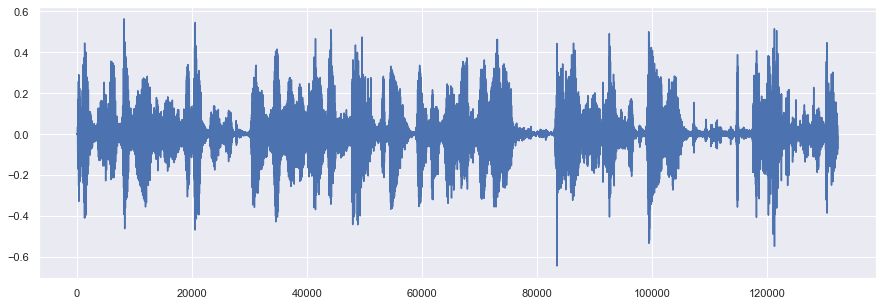

Los modelos ARIMA son los más conocidos y usados en el análisis de series temporales, destacando por su potencia predictiva, pero tienen un handicap: no son aplicables a cualquier serie temporal, pues exigen que ésta cumpla ciertos requisitos matemáticos.

En cualquier caso, con independencia del modelo predictivo a usar, necesitamos partir de un conjunto de datos con el formato adecuado -en general será una serie o un dataframe pandas con índice temporal-, lo que nos obliga a ser capaces de leer los datos y a transformarlos correctamente.

A continuación, en función de múltiples variables entre las que se encuentran las propiedades matemáticas del conjunto de datos, nos decantaremos por un algoritmo u otro.

Es por todo esto que resulta necesario dedicar tiempo a todos estos elementos: a revisar las funciones de pandas que nos permiten "dar forma" a nuestros datos, a los conceptos matemáticos involucrados, a la forma de trabajo de estos algoritmos, etc.

Comencemos revisando las herramientas que ofrece pandas.

# Base teórica
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## Carga y transformación de datos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Comencemos cargando un conjunto de datos con información temporal: el dataset <i>candy</i> con información sobre la producción de caramelos en los Estados Unidos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn")                  # Establecemos el estilo gráfico de seaborn por defecto
plt.rcParams["figure.figsize"] = (15, 5)  # Tamaño por defecto de las gráficas a crear

In [3]:
import os

In [4]:
os.chdir("./data") # Establecemos el directorio de trabajo por defecto. En mi caso es el subdirectorio /data

Leemos el csv con los datos de producción de caramelos...

In [5]:
candy = pd.read_csv("candy_production.csv")
candy.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [6]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  548 non-null    object 
 1   IPG3113N          548 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


Necesitamos que las fechas se interpreten como tales:

In [7]:
candy = pd.read_csv("candy_production.csv", parse_dates = ["observation_date"])
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  548 non-null    datetime64[ns]
 1   IPG3113N          548 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


Renombramos las columnas:

In [8]:
candy.rename({"observation_date": "date", "IPG3113N": "production"}, inplace = True, axis = 1)
candy.head()

,date,production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


Llevamos el campo de fecha al índice del dataframe:

In [9]:
candy.set_index("date", inplace = True)
candy.head()

,production
date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


In [10]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 1972-01-01 to 2017-08-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


Comprobamos que el índice es un conjunto de fechas sin hacer referencia al período mensual al que se refiere cada dato. Lo modificamos:

In [11]:
candy = candy.to_period("M")       # Convertimos las fechas en períodos
candy.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 548 entries, 1972-01 to 2017-08
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [12]:
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


Para mostrar la gráfica con la evolución en el tiempo, usamos las herramientas de pandas (que se basan en Matplotlib), pues Matplotlib directamente no es capaz de lidiar adecuadamente con dataframes en los que el índice es de tipo temporal:

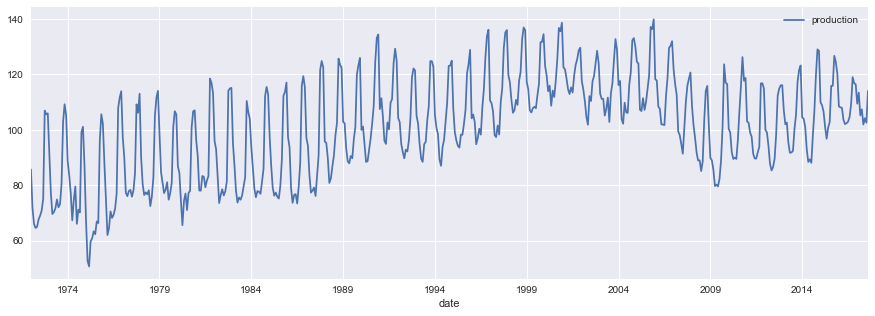

In [13]:
candy.plot()
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Carga y muestra en pantalla los datos relativos al valor bursátil de IBM (dataset "ibm.txt"). Quédate apenas con el campo "Close" (además del campo que contiene la fecha, por supuesto).</div>
</div>

In [14]:
ibm = pd.read_csv("ibm.txt", usecols = ["Date", "Close"], parse_dates = ["Date"], index_col = "Date")
ibm = ibm.to_period("D")
ibm.head()

,Close
Date,
1962-01-02,6.3378
1962-01-03,6.3963
1962-01-04,6.3295
1962-01-05,6.2041
1962-01-08,6.0870


In [15]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 14059 entries, 1962-01-02 to 2017-11-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   14059 non-null  float64
dtypes: float64(1)
memory usage: 219.7 KB


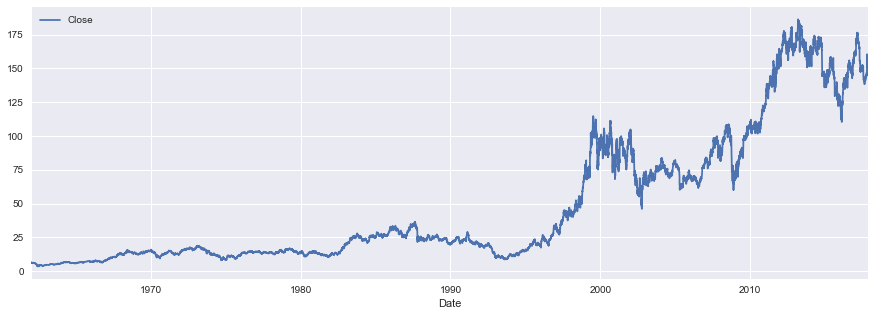

In [16]:
ibm.plot();   # Podemos sustituir la función plt.show() por un punto y coma tras la última función que cree una gráfica

## Tipos de datos temporales en pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Para ser capaces de analizar series temporales debemos saber cómo representar fechas, horas, y períodos de tiempo. Aunque la librería datetime de Python ofrece clases temporales básicas, pandas utiliza sus propias clases, que debemos conocer para transformar correctamente los datos leídos como dataframes.

#### La clase Timestamp

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

La clase Timestamp representa un momento en el tiempo, un instante concreto (equivalente a datetime.datetime). Podemos crear un objeto de esta clase a partir de una cadena de texto:

In [17]:
pd.Timestamp("1/2/2019")

Timestamp('2019-01-02 00:00:00')

...o especificando los parámetros correspondientes:

In [18]:
pd.Timestamp(2019, 2, 1)

Timestamp('2019-02-01 00:00:00')

In [19]:
pd.Timestamp(2019, 2, 1, 16, 17, 22)

Timestamp('2019-02-01 16:17:22')

Acepta los parámetros year, month, day, hour, minute, second, microsecond y nanosecond

In [20]:
pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)

Timestamp('2019-10-28 16:56:12.000013016')

También se puede crear a partir de un objeto datetime.date o datetime.datetime:

In [21]:
from datetime import date

In [22]:
pd.Timestamp(date(2019, 8, 26))

Timestamp('2019-08-26 00:00:00')

Podemos acceder a los valores vía atributos:

In [23]:
d = pd.Timestamp(year = 2019, month = 10, day = 28, hour = 16, minute = 56, second = 12,
                 microsecond = 13, nanosecond = 16)
d

Timestamp('2019-10-28 16:56:12.000013016')

In [24]:
print(d.year)
print(d.month)
print(d.day)
print(d.hour)
print(d.minute)
print(d.second)
print(d.microsecond)
print(d.nanosecond)

2019
10
28
16
56
12
13
16


pandas incluye gran cantidad de atributos y métodos adicionales para acceder a otro tipo de información:

In [25]:
print(d.quarter)
print(d.week)
print(d.dayofweek)
print(d.dayofyear)
print(d.day_name())
print(d.month_name())

4
44
0
301
Monday
October


#### La clase Period

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Period.html

La clase pd.Period representa un período de tiempo, no un instante. Siempre tiene asociado una frecuencia, el mes por defecto.

In [26]:
p = pd.Period("2017-01")
p

Period('2017-01', 'M')

Podemos extraer el principio y el final del período:

In [27]:
p.start_time

Timestamp('2017-01-01 00:00:00')

In [28]:
p.end_time

Timestamp('2017-01-31 23:59:59.999999999')

Es posible cambiar de frecuencia con el método asfreq():

In [29]:
p.asfreq("D")

Period('2017-01-31', 'D')

Si indicamos una cierta frecuencia, se pierde la información no relevante:

In [30]:
p = pd.Period("2017-05-23")
p

Period('2017-05-23', 'D')

In [31]:
q = p.asfreq("M")
q

Period('2017-05', 'M')

Ahora, si volvemos a aplicar una frecuencia diaria...

In [32]:
q.asfreq("D")

Period('2017-05-31', 'D')

También es posible convertir un objeto de tipo Period en Timestamp:

In [33]:
pd.Period("2018-05").to_timestamp()

Timestamp('2018-05-01 00:00:00')

Podemos realizar aritmética simple:

In [34]:
p = pd.Period("2017-05-23")
p + 2

Period('2017-05-25', 'D')

In [35]:
p = pd.Period("2017-05-23")
q = pd.Period("2017-05-28")
q - p

<5 * Days>

A pesar de lo útil que es en ocasiones pensar en períodos en lugar de en instantes de tiempo, matplotlib tiene problemas con esta clase. Las herramientas de creación de gráficas de pandas no tienen problemas -lógicamente-, pero si se mezclan en la misma gráfica datos que provienen de pandas y de matplotlib (lo que en ocasiones no se puede evitar), podemos encontrarnos con problemas.

#### La clase Timedelta

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html

La clase Timedelta representa una diferencia entre dos objetos de tipo pd.timestamp. Estas variables también pueden ser creadas explícitamente:

In [36]:
d = pd.Timedelta(weeks = 1, days = 2, hours = 3, minutes = 4, seconds = 5, milliseconds = 6,
                 microseconds = 7, nanoseconds = 8)
d

Timedelta('9 days 03:04:05.006007')

Podemos extraer la información asociada vía atributos:

In [37]:
print(d.days)
print(d.seconds)
print(d.microseconds)
print(d.nanoseconds)

9
11045
6007
8


Como el resto de funciones pandas, permite gran libertad a la hora de indicar el período:

In [38]:
pd.Timedelta("1 day 1 second")

Timedelta('1 days 00:00:01')

In [39]:
pd.Timedelta("1 day 1 millisecond")

Timedelta('1 days 00:00:00.001000')

In [40]:
pd.Timedelta("1 hour")

Timedelta('0 days 01:00:00')

In [41]:
pd.Timedelta("2 hour")

Timedelta('0 days 02:00:00')

In [42]:
pd.Timedelta("2 hours")

Timedelta('0 days 02:00:00')

In [43]:
pd.Timedelta("2.3 hours")

Timedelta('0 days 02:18:00')

In [44]:
pd.Timestamp(2019, 8, 25, 18, 49) + pd.Timedelta("3 hours")

Timestamp('2019-08-25 21:49:00')

#### La clase date_range

Podemos crear índices formados por secuencias de fechas con la función pd.date_range(). El rango podrá venir definido por una fecha de comienzo, una fecha de finalización, un número de períodos y una frecuencia (por tres de estos cuatro parámetros).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

En este primer ejemplo creamos un índice de 5 períodos y frecuencia mensual a partir del 28 de agosto de 2018:

In [45]:
pd.date_range("August, 28 2018", periods = 5, freq = "M")

DatetimeIndex(['2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

Si fuese frecuencia diaria:

In [46]:
pd.date_range("August, 28 2018", periods = 5, freq = "D")

DatetimeIndex(['2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31',
               '2018-09-01'],
              dtype='datetime64[ns]', freq='D')

Podemos indicar las fechas de comienzo, finalización y la frecuencia deseada:

In [47]:
pd.date_range(start = date(2019, 8, 13), end = date(2019, 9, 21), freq = "W")

DatetimeIndex(['2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15'],
              dtype='datetime64[ns]', freq='W-SUN')

Hay diversas formas de especificar la frecuencia: MS hace referencia al comienzo del mes.

In [48]:
pd.date_range(start = "2018-01-1", end = "2019-12-31", freq = "MS")

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

Frecuencia horaria:

In [49]:
from datetime import datetime

In [50]:
pd.date_range(start = datetime.today(), periods = 5, freq = "H")

DatetimeIndex(['2020-02-27 13:37:12.004376', '2020-02-27 14:37:12.004376',
               '2020-02-27 15:37:12.004376', '2020-02-27 16:37:12.004376',
               '2020-02-27 17:37:12.004376'],
              dtype='datetime64[ns]', freq='H')

In [51]:
pd.date_range(start = "2019-1-1", end = "2019-3-1", periods = 4)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-20 16:00:00',
               '2019-02-09 08:00:00', '2019-03-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Con el carácter "B" indicamos los "business days":

In [52]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B")

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30'],
              dtype='datetime64[ns]', freq='B')

También podemos operar con el índice obtenido, por ejemplo, añadiendo un Timedelta:

In [53]:
pd.date_range(start = "2019-8-1", end = "2019-8-31", freq = "B") + pd.Timedelta("3 hours")

DatetimeIndex(['2019-08-01 03:00:00', '2019-08-02 03:00:00',
               '2019-08-05 03:00:00', '2019-08-06 03:00:00',
               '2019-08-07 03:00:00', '2019-08-08 03:00:00',
               '2019-08-09 03:00:00', '2019-08-12 03:00:00',
               '2019-08-13 03:00:00', '2019-08-14 03:00:00',
               '2019-08-15 03:00:00', '2019-08-16 03:00:00',
               '2019-08-19 03:00:00', '2019-08-20 03:00:00',
               '2019-08-21 03:00:00', '2019-08-22 03:00:00',
               '2019-08-23 03:00:00', '2019-08-26 03:00:00',
               '2019-08-27 03:00:00', '2019-08-28 03:00:00',
               '2019-08-29 03:00:00', '2019-08-30 03:00:00'],
              dtype='datetime64[ns]', freq='B')

<div style="background:#0099cc;padding:20px;color:#ffffff">
    <strong>EJERCICIO</strong>
Crea un dataframe df con 12 fechas consecutivas (interpretadas como puntos en el tiempo) a partir del 1 de enero de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

In [54]:
index = pd.date_range("2019-1-1", periods = 12, freq = "D")
df = pd.DataFrame({"Value": np.random.rand(12)}, index = index)
df

,Value
2019-01-01,0.324262
2019-01-02,0.376258
2019-01-03,0.329397
2019-01-04,0.530136
2019-01-05,0.914846
2019-01-06,0.147915
2019-01-07,0.765322
2019-01-08,0.318000
2019-01-09,0.571212
2019-01-10,0.237311


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
Crea un dataframe df con 6 horas consecutivas (interpretadas como períodos) a partir de las 6 de la tarde del 11 de marzo de 2019 en el índice y una columna "Value" con valores aleatorios:
</div>

In [55]:
index = pd.period_range("2019-1-1 18:00:00", periods = 6, freq = "H")
df = pd.DataFrame({"Value": np.random.rand(6)}, index = index)
df

,Value
2019-01-01 18:00,0.232737
2019-01-01 19:00,0.679901
2019-01-01 20:00,0.597203
2019-01-01 21:00,0.077415
2019-01-01 22:00,0.491159
2019-01-01 23:00,0.326538


#### La clase period_range

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html

También podemos crear un índice de períodos:

In [56]:
p = pd.period_range(start = "2019-1-1T15:0:0", periods = 12, freq = "H")
p

PeriodIndex(['2019-01-01 15:00', '2019-01-01 16:00', '2019-01-01 17:00',
             '2019-01-01 18:00', '2019-01-01 19:00', '2019-01-01 20:00',
             '2019-01-01 21:00', '2019-01-01 22:00', '2019-01-01 23:00',
             '2019-01-02 00:00', '2019-01-02 01:00', '2019-01-02 02:00'],
            dtype='period[H]', freq='H')

## Herramientas de pandas
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Remuestreado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

Una vez leído un dataset, no siempre va a contener los datos con la granularidad que queremos:

In [57]:
global_temp = pd.read_csv("global_temperature_monthly.csv", parse_dates = ["Date"], index_col = "Date")
global_temp.head(10)

,Source,Mean
Date,,
2016-12-06,GCAG,0.7895
2016-12-06,GISTEMP,0.8100
2016-11-06,GCAG,0.7504
2016-11-06,GISTEMP,0.9300
2016-10-06,GCAG,0.7292
2016-10-06,GISTEMP,0.8900
2016-09-06,GCAG,0.8767
2016-09-06,GISTEMP,0.8700
2016-08-06,GCAG,0.8998


En este ejemplo, partimos de temperaturas tomadas el día 6 de cada mes en dos sistemas distintos:

In [58]:
global_temp.Source.unique()

array(['GCAG', 'GISTEMP'], dtype=object)

Podríamos querer agrupar los datos por mes, para lo que podemos usar el método .resample(). Tras realizar el remuestreado, necesitamos aplicar una función de agregación:

In [59]:
global_temp.resample("M").mean().head()

,Mean
Date,
1880-01-31,-0.14955
1880-02-29,-0.16645
1880-03-31,-0.15785
1880-04-30,-0.15995
1880-05-31,-0.10690


Si quisiéramos remuestrear por años:

In [60]:
global_temp.resample("A").mean().head()

,Mean
Date,
1880-12-31,-0.159467
1881-12-31,-0.089329
1882-12-31,-0.083667
1883-12-31,-0.176208
1884-12-31,-0.242550


Esto es especialmente útil si las fechas no son periódicas:

In [61]:
data = pd.read_csv("months.csv", parse_dates = ["date"], index_col = "date")
data

,value
date,
2019-01-04,8
2019-01-16,4
2019-03-02,9
2019-03-03,3
2019-03-11,4
2019-04-02,7
2019-06-06,3
2019-06-26,5
2019-07-18,1


In [62]:
data_monthly = data.resample("M").sum()
data_monthly

,value
date,
2019-01-31,12
2019-02-28,0
2019-03-31,16
2019-04-30,7
2019-05-31,0
2019-06-30,8
2019-07-31,7


### Interpolado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

Una herramienta muy útil es la que nos permite sustituir valores nulos por el resultado de interpolar los valores existentes. Supongamos que partimos del siguiente dataframe:

In [63]:
data = pd.read_csv("days.csv", parse_dates = ["date"], index_col = "date")
data

,value
date,
2019-01-01,8
2019-01-02,4
2019-01-04,9
2019-01-05,3
2019-01-08,4
2019-01-09,7


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-01-01 to 2019-01-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


El dataframe no incluye información sobre la frecuencia. Supongamos que queremos que este conjunto de datos represente la cifra en cuestión por día (es decir, queremos que haya un entrada para cada día en lugar de días sueltos). Podemos hacerlo con el método .asfreq():

In [65]:
daily_data = data.asfreq("D")
daily_data

,value
date,
2019-01-01,8.0
2019-01-02,4.0
2019-01-03,NaN
2019-01-04,9.0
2019-01-05,3.0
2019-01-06,NaN
2019-01-07,NaN
2019-01-08,4.0
2019-01-09,7.0


Vemos que tenemos nulos en aquellos días para los que no había datos. Pero si tuviese sentido realizar un interpolado, podríamos hacerlo con el método .interpolate():

In [66]:
daily_data.interpolate()

,value
date,
2019-01-01,8.000000
2019-01-02,4.000000
2019-01-03,6.500000
2019-01-04,9.000000
2019-01-05,3.000000
2019-01-06,3.333333
2019-01-07,3.666667
2019-01-08,4.000000
2019-01-09,7.000000


### Truncado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.truncate.html

Otro útil método es .truncate(), que nos permite eliminar los índices anteriores y/o posteriores a uno dado.

**IMPORTANTE**: El índice deberá estar ordenado.

In [67]:
data = pd.Series(np.arange(10))
data

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [68]:
data.truncate(before = 5)

5    5
6    6
7    7
8    8
9    9
dtype: int32

In [69]:
data.truncate(after = 6)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int32

In [70]:
data.truncate(before = 4, after = 6)

4    4
5    5
6    6
dtype: int32

Aplicado a un índice temporal:

In [71]:
candy.head()

,production
date,
1972-01,85.6945
1972-02,71.8200
1972-03,66.0229
1972-04,64.5645
1972-05,65.0100


In [72]:
candy.truncate(before = "1980").head()

,production
date,
1980-01,86.9268
1980-02,84.4365
1980-03,74.4834
1980-04,65.5610
1980-05,74.3631


In [73]:
candy.truncate(before = "1980-05", after = "1980-09")

,production
date,
1980-05,74.3631
1980-06,76.9925
1980-07,71.0376
1980-08,77.2616
1980-09,77.9510


Apliquémoslo al mismo dataframe remuestreado por años:

In [74]:
candy_year = candy.resample("A").mean()
candy_year.head()

,production
date,
1972,79.514758
1973,83.185925
1974,80.476425
1975,71.167617
1976,81.643833


In [75]:
candy_year.truncate(before = "1978", after = "1982")

,production
date,
1978,86.772650
1979,87.272417
1980,83.633300
1981,91.867800
1982,90.019850


### Desplazamientos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El método .shift() aplicado a una serie o a un dataframe nos permite desplazarlo en una dirección (por defecto hacia abajo):

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [76]:
sample = candy_year.head()
sample

,production
date,
1972,79.514758
1973,83.185925
1974,80.476425
1975,71.167617
1976,81.643833


In [77]:
sample.shift(1)

,production
date,
1972,NaN
1973,79.514758
1974,83.185925
1975,80.476425
1976,71.167617


In [78]:
sample.shift(2)

,production
date,
1972,NaN
1973,NaN
1974,79.514758
1975,83.185925
1976,80.476425


También es posible desplazar el dataframe o la serie hacia arriba:

In [79]:
sample.shift(-1)

,production
date,
1972,83.185925
1973,80.476425
1974,71.167617
1975,81.643833
1976,NaN


O hacia los lados...

In [80]:
data = pd.DataFrame(np.random.randint(0, 10, 20).reshape(4, -1), columns = list("ABCDE"))
data

,A,B,C,D,E
0,0,0,0,7,0
1,7,0,8,4,9
2,7,2,7,2,2
3,2,4,4,8,2


In [81]:
data.shift(1, axis = 1)

,A,B,C,D,E
0,NaN,0.0,0.0,0.0,7.0
1,NaN,7.0,0.0,8.0,4.0
2,NaN,7.0,2.0,7.0,2.0
3,NaN,2.0,4.0,4.0,8.0


In [82]:
data.shift(-1, axis = 1)

,A,B,C,D,E
0,0.0,0.0,7.0,0.0,NaN
1,0.0,8.0,4.0,9.0,NaN
2,2.0,7.0,2.0,2.0,NaN
3,4.0,4.0,8.0,2.0,NaN


### Diferencias
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html

El método .diff() permite calcular la diferencia de las columnas o filas de un dataframe:

In [83]:
data

,A,B,C,D,E
0,0,0,0,7,0
1,7,0,8,4,9
2,7,2,7,2,2
3,2,4,4,8,2


Por ejemplo, podemos calcular la diferencia de cada fila con la anterior:

In [84]:
data.diff()

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,7.0,0.0,8.0,-3.0,9.0
2,0.0,2.0,-1.0,-2.0,-7.0
3,-5.0,2.0,-3.0,6.0,0.0


O la diferencia de cada fila con la fila que ocupa dos posiciones antes:

In [85]:
data.diff(2)

,A,B,C,D,E
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,7.0,2.0,7.0,-5.0,2.0
3,-5.0,4.0,-4.0,4.0,-7.0


Aplicado a una serie, el método resta la serie consigo misma tras desplazarla el número de períodos que se indique:

In [86]:
s = pd.Series([2, 5, 4, 7, 6, 1, 5, 3])
s

0    2
1    5
2    4
3    7
4    6
5    1
6    5
7    3
dtype: int64

In [87]:
s.diff()

0    NaN
1    3.0
2   -1.0
3    3.0
4   -1.0
5   -5.0
6    4.0
7   -2.0
dtype: float64

In [88]:
s.diff(2)

0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
5   -6.0
6   -1.0
7    2.0
dtype: float64

Esta herramienta nos va a ser muy útil más adelante

## Conceptos matemáticos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

### Correlación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La correlación entre dos variables estadísticas (entre dos conjuntos de datos) nos indica el grado de relación lineal entre ambas series. Decimos que dos variables están correlacionadas cuando los valores de una de ellas varian de forma sistemática con las variaciones de la otra (si aumenta una cuando aumenta la otra y al revés).

Hay varias formas de medir la correlación (los coeficientes de Pearson, Kendall y Spearman son los más conocidos). El más usado es el coeficiente de Pearson, que varía entre -1 y 1:

Esta relación se ve muy bien comparando las gráficas y en un diagrama de dispersión:

Alta correlación (positiva):

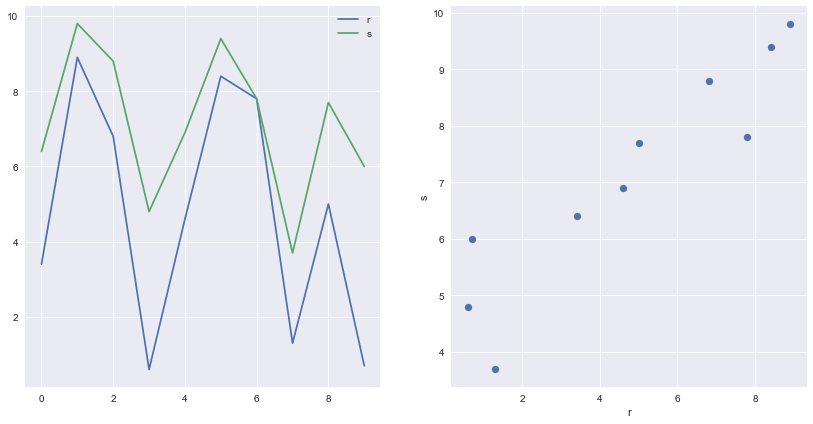

0.9215849991769304


In [89]:
r = pd.Series([3.4, 8.9, 6.8, 0.6, 4.6, 8.4, 7.8, 1.3, 5.0 , 0.7])
s = pd.Series([6.4, 9.8, 8.8, 4.8, 6.9, 9.4, 7.8, 3.7, 7.7, 6.0 ])

fig, ax = plt.subplots(1, 2, figsize = (14, 7))
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(x = r, y = s)
ax[1].set_xlabel("r")
ax[1].set_ylabel("s")

plt.show()
print(r.corr(s))

Alta correlación (negativa):

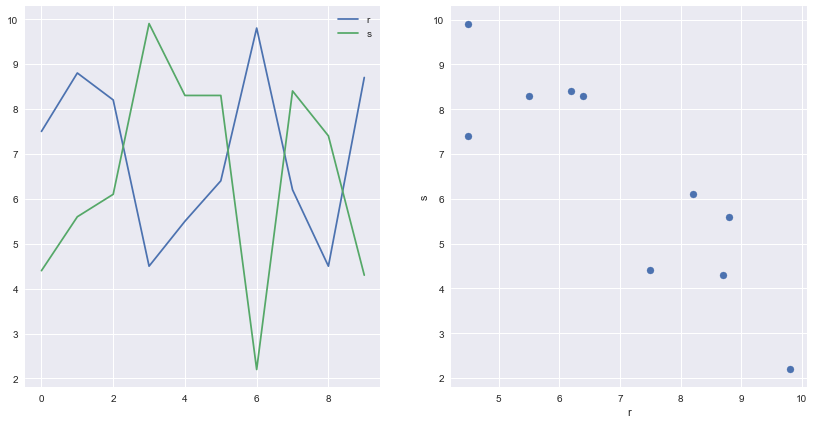

-0.8725229717753339


In [90]:
r = pd.Series([7.5, 8.8, 8.2, 4.5, 5.5, 6.4, 9.8, 6.2, 4.5, 8.7])
s = pd.Series([4.4, 5.6, 6.1, 9.9, 8.3, 8.3, 2.2, 8.4, 7.4, 4.3])

fig, ax = plt.subplots(1, 2, figsize = (14, 7))
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(x = r, y = s)
ax[1].set_xlabel("r")
ax[1].set_ylabel("s")

plt.show()
print(r.corr(s))

Baja correlación:

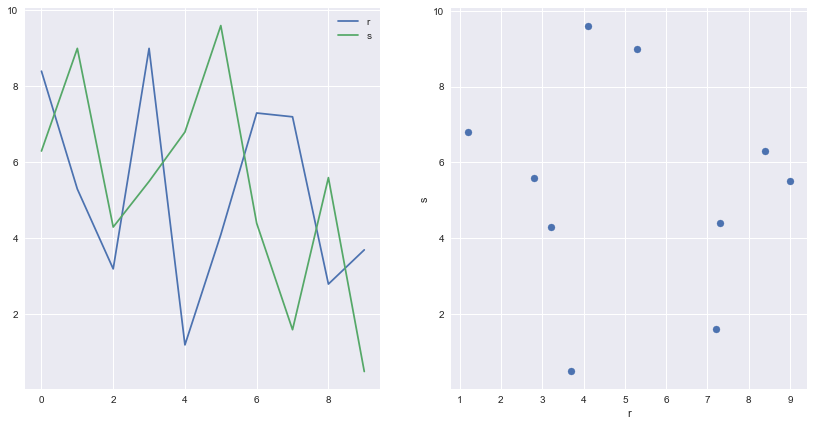

-0.10630510433176735


In [91]:
r = pd.Series([8.4, 5.3, 3.2, 9. , 1.2, 4.1, 7.3, 7.2, 2.8, 3.7])
s = pd.Series([6.3, 9. , 4.3, 5.5, 6.8, 9.6, 4.4, 1.6, 5.6, 0.5])

fig, ax = plt.subplots(1, 2, figsize = (14, 7))
ax[0].plot(r, label = "r")
ax[0].plot(s, label = "s")
ax[0].legend()

ax[1].scatter(x = r, y = s)
ax[1].set_xlabel("r")
ax[1].set_ylabel("s")

plt.show()
print(r.corr(s))

Es importante destacar que la correlación entre dos variables no implica necesariamente una relación de causalidad:

http://tylervigen.com/view_correlation?id=1703

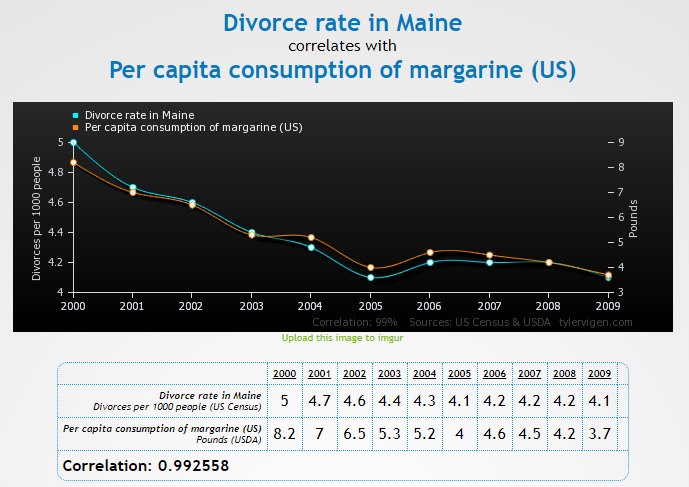

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en una gráfica la evolución de los valores bursátiles de IBM y Apple, y calcula la correlación entre ellos. Quédate solo con la columna "Close" (además de la que contiene la etiqueta temporal).</div>
</div>

In [92]:
ibm = pd.read_csv("ibm.txt", parse_dates = ["Date"], usecols = ["Date", "Close"], index_col = "Date")
ibm.head()

,Close
Date,
1962-01-02,6.3378
1962-01-03,6.3963
1962-01-04,6.3295
1962-01-05,6.2041
1962-01-08,6.0870


In [93]:
apple = pd.read_csv("aapl.txt", parse_dates = ["Date"], usecols = ["Date", "Close"], index_col = "Date")
apple.head()

,Close
Date,
1984-09-07,0.42388
1984-09-10,0.42134
1984-09-11,0.42902
1984-09-12,0.41618
1984-09-13,0.43927


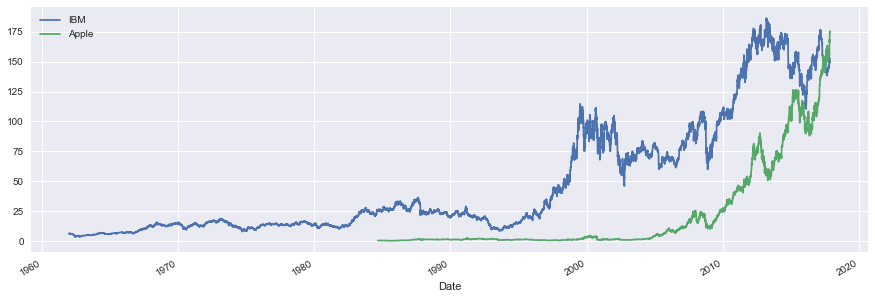

In [94]:
ax = plt.axes()
ibm.plot(ax = ax)
apple.plot(ax = ax)
ax.legend(["IBM", "Apple"])
plt.show()

In [95]:
apple.Close.corr(ibm.Close)

0.7963330127407169

### Autocorrelación
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En la mayor parte de las series temporales existe una estructura interna que podemos analizar mediante su autocorrelación y su autocorrelación parcial.

Definimos la autocorrelación de una variable como la correlación de la variable con respecto a sí misma desplazada n-lags.

In [96]:
s = pd.Series(np.random.randint(0, 5, (10)))
s

0    3
1    0
2    2
3    3
4    1
5    0
6    2
7    1
8    3
9    1
dtype: int32

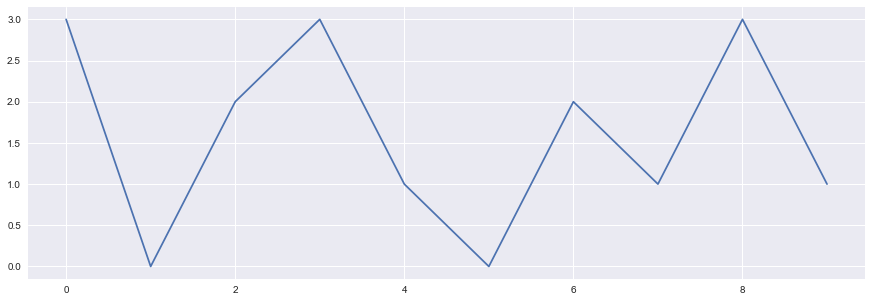

In [97]:
s.plot();

Si no desplazamos la serie, la autocorrelación es 1:

In [98]:
s.corr(s)

1.0

Podemos desplazar la serie con el método .shift() de pandas que ya hemos visto:

In [99]:
s.shift(1)

0    NaN
1    3.0
2    0.0
3    2.0
4    3.0
5    1.0
6    0.0
7    2.0
8    1.0
9    3.0
dtype: float64

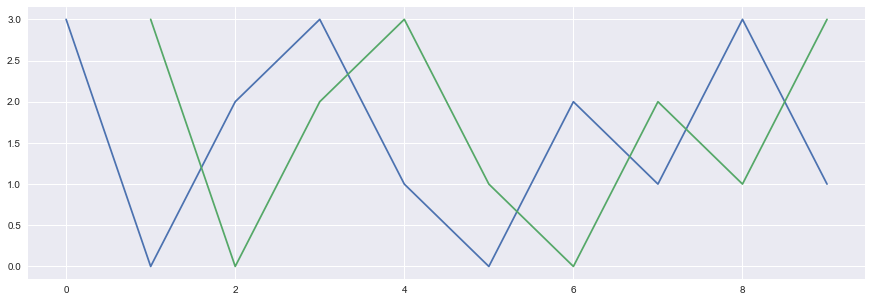

-0.42135048580019224


In [100]:
s.plot()
s.shift(1).plot()
plt.show()
print(s.corr(s.shift(1)))

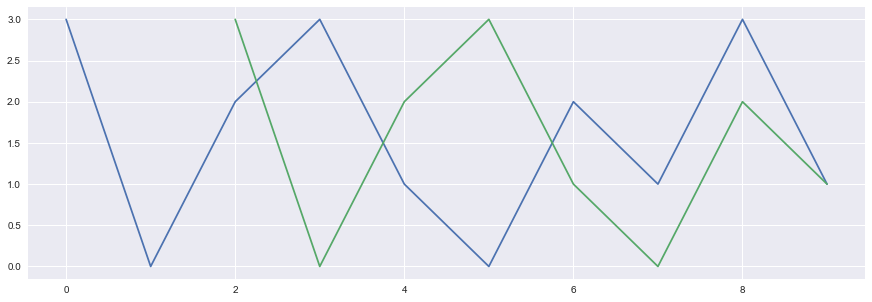

-0.28171808490950556


In [101]:
s.plot()
s.shift(2).plot()
plt.show()
print(s.corr(s.shift(2)))

¿Qué tipo de series mostrarán autocorrelación alta para algún lag? Las perfectamente periódicas:

In [102]:
x = np.linspace(0, 12, 24)
y = np.sin(x)
y = pd.Series(y)

1.0


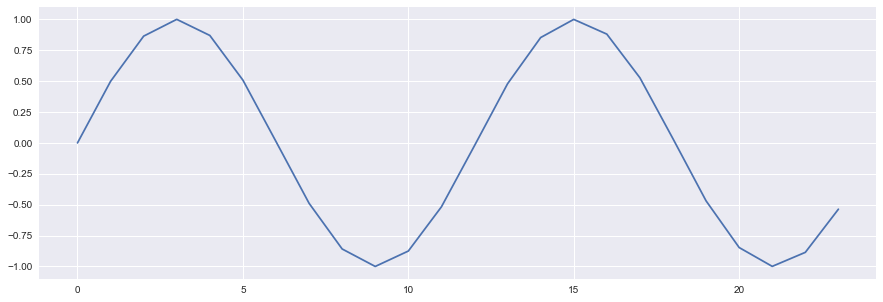

In [103]:
plt.plot(y);
print(y.corr(y))

Desplazamos la serie y calculamos su correlación con la versión desplazada:

0.8769662829481311


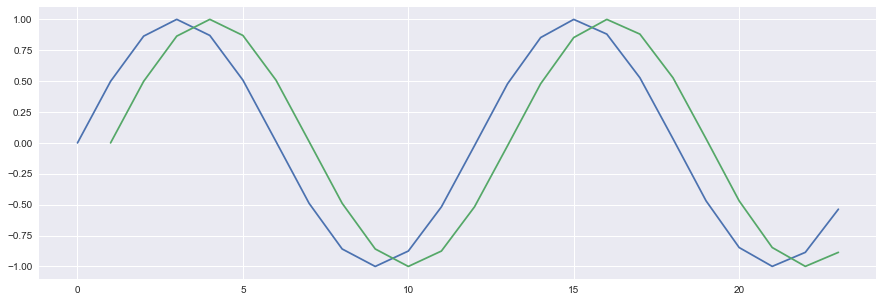

In [104]:
lags = 1
plt.plot(y);
plt.plot(y.shift(lags))
print(y.corr(y.shift(lags)))

0.10295090073607359


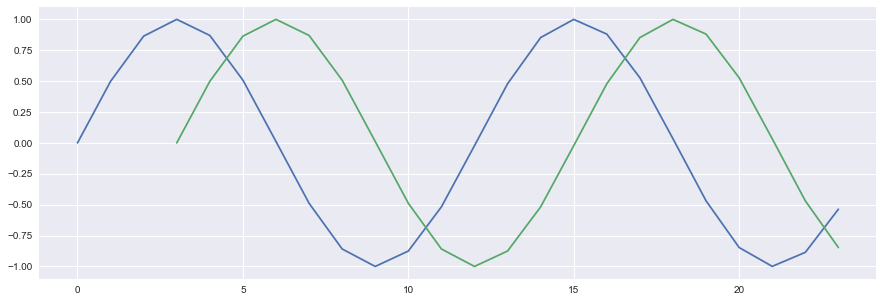

In [105]:
lags = 3
plt.plot(y);
plt.plot(y.shift(lags))
print(y.corr(y.shift(lags)))

-0.999932907269958


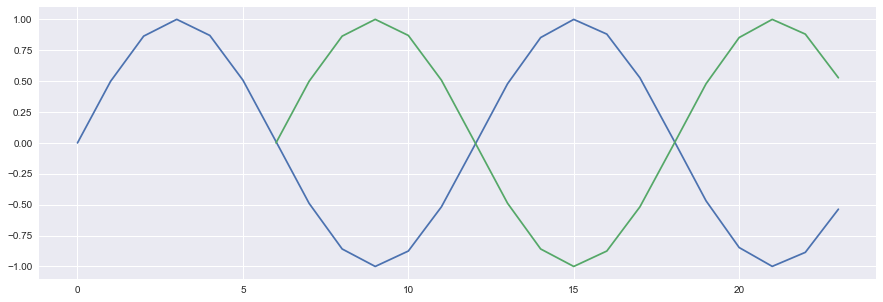

In [106]:
lags = 6
plt.plot(y);
plt.plot(y.shift(lags))
print(y.corr(y.shift(lags)))

Comprobamos que va disminuyendo a medida que la copia se aleja de la original, pero que vuelve a aumentar a medida que vuelve a acercarse.

0.9997525833198961


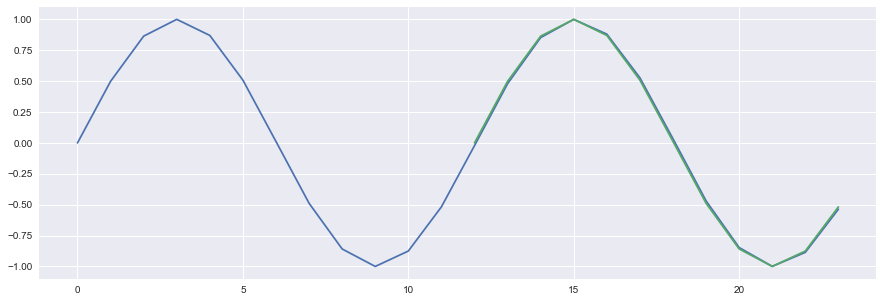

In [107]:
lags = 12
plt.plot(y);
plt.plot(y.shift(lags))
print(y.corr(y.shift(lags)))

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Calcula la autocorrelación de la función senoidal y para los lags entre 0 y 19</div>
</div>

In [108]:
for lag in range(20):
    print(lag, y.corr(y.shift(lag)))

0 1.0
1 0.8769662829481311
2 0.5582079972438304
3 0.10295090073607359
4 -0.4156445200785021
5 -0.8400800103410611
6 -0.999932907269958
7 -0.8754213232665884
8 -0.5554622541938353
9 -0.10504434514224269
10 0.41287463084238285
11 0.8394041433021404
12 0.9997525833198961
13 0.8968791741912433
14 0.6497962146967481
15 0.32657217479330264
16 -0.09108626980054128
17 -0.631830220760804
18 -0.9982702377583391
19 -0.5889255730259966


### La función de autocorrelación (ACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

La función de autocorrelación o ACF es el conjunto de autocorrelaciones para un rango de lags, por ejemplo entre 0 y 30 -exactamente lo que hemos calculado a mano-.

Statsmodels nos ofrece una función para esto: acf

In [109]:
from statsmodels.tsa.stattools import acf

In [110]:
acf(y, nlags = 30, unbiased = True, fft = False)

array([ 1.        ,  0.90356254,  0.56950828,  0.08577032, -0.4206237 ,
       -0.81702267, -0.99993975, -0.92199644, -0.60398943, -0.12901963,
        0.37962086,  0.79083506,  0.99975258,  0.9544279 ,  0.66826273,
        0.21507171, -0.29164254, -0.72945374, -0.99945468, -1.05167003,
       -0.89672287, -0.60081893, -0.26565356,  0.00107954])

También podemos mostrar en una gráfica estos valores con la función plot_acf de statsmodels:

In [111]:
from statsmodels.graphics.tsaplots import plot_acf

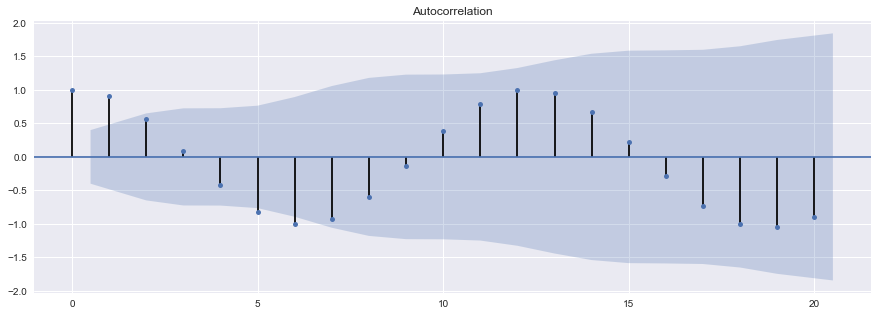

In [112]:
plot_acf(y, lags = 20, unbiased = True);

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra en pantalla la función de autocorrelación de candy para los 50 primeros lags. Interpreta el resultado</div>
</div>

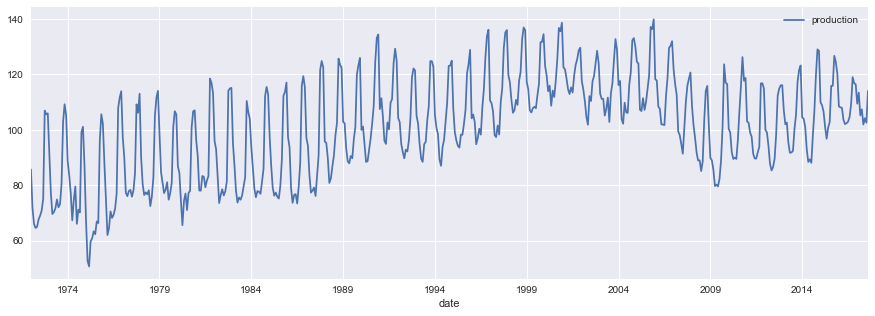

In [113]:
candy.plot();

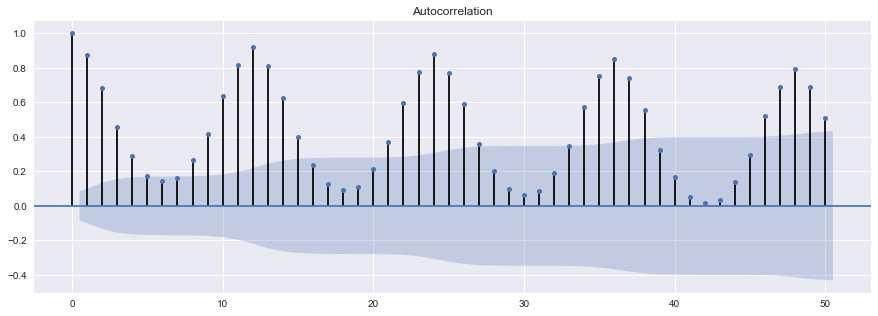

In [114]:
plot_acf(candy, lags = 50, unbiased = True);

Del análisis visual de la función de autocorrelación podemos determinar la periodicidad de nuestra serie temporal.

### La función de autocorrelación parcial (PACF)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Supongamos una serie periódica de periodo 12, como las ventas mensuales de turrones. La ACF de esta serie mostrará, por ejemplo, que el período 12 (diciembre del primer año) muestra una alta correlación con el período 24 (diciembre del segundo año), y con el período 36, y con el 48... pero, en realidad, no es que el período 12 esté relacionado con el 48. Es que lo está con el 24, y éste a su vez con el 36, y éste con el 48... O, dicho con otras palabras, aunque los períodos 24, 36, 48... muestren todos ellos una alta correlación con el período 12, no todos influyen en el valor del período 12. Influye el primero (el valor del período 24), los demás no son más que una repetición de esta influencia.

Es por esto que se define la función de autocorrelación parcial, PACF, como el conjunto de resultados de calcular la autocorrelación de la serie consigo misma desplazada un número de lags, eliminando la influencia de los lags menores. Así, la PACF del período 36 en el ejemplo anterior mostrará cómo influye en el valor del período 12 tras eliminar el efecto de autocorrelación del período 24.

statsmodels ofrece una función funciones para su cálculo y la creación de una gráfica con dichos datos:

In [115]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

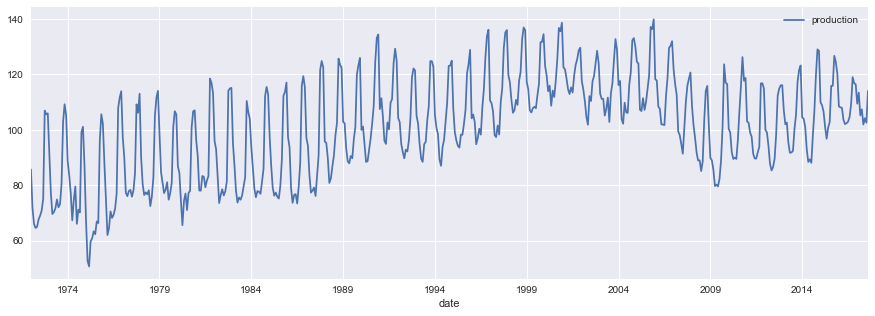

In [116]:
candy.plot();

In [117]:
pacf(candy, nlags = 29, method = "ywm")

array([ 1.        ,  0.87400876, -0.34228533, -0.23683325,  0.22000145,
        0.00795123,  0.11452043,  0.08284885,  0.33435794,  0.28192485,
        0.47057271,  0.30495909,  0.27818245, -0.60475432, -0.06231449,
       -0.07344167,  0.06713202,  0.04886614, -0.03656263,  0.04002994,
        0.03856781, -0.00960138,  0.13430432,  0.04189564,  0.09440171,
       -0.2242872 , -0.01093314,  0.01117188,  0.09745395, -0.00741352])

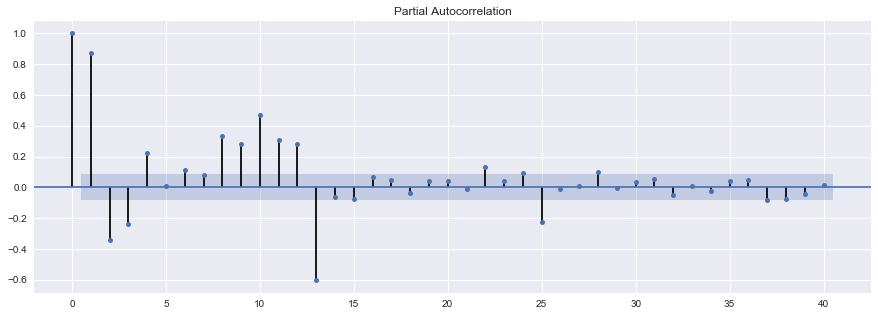

In [118]:
plot_pacf(candy, lags = 40, method = "ywm");

Vídeo recomendado:

https://youtu.be/ZjaBn93YPWo

### Ruido blanco
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El ruido blanco es un concepto importante en el análisis de series temporales. Hacemos referencia con este término a aquella serie temporal que tiene valor medio, varianza constante y autocorrelación nula para todos los lags.

Un ejemplo que se pone frecuentemente es el del lanzamiento de una moneda: si damos al resultado "cara" el valor 0, y al resultado "cruz" el valor 1 (por ejemplo), el resultado de lanzar 1000 monedas es ruido blanco.

Podemos generar series de ruido blanco con las funciones de generación de números aleatorios de numpy:

Números aleatorios extraídos de una distribución uniforme:

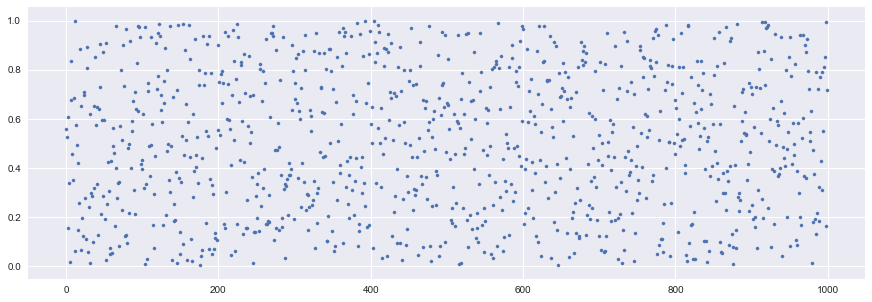

In [119]:
s = np.random.rand(1000)
plt.scatter(range(len(s)), s, s = 10);

Extraídos de una distribución gaussiana (ruido blanco gaussiano):

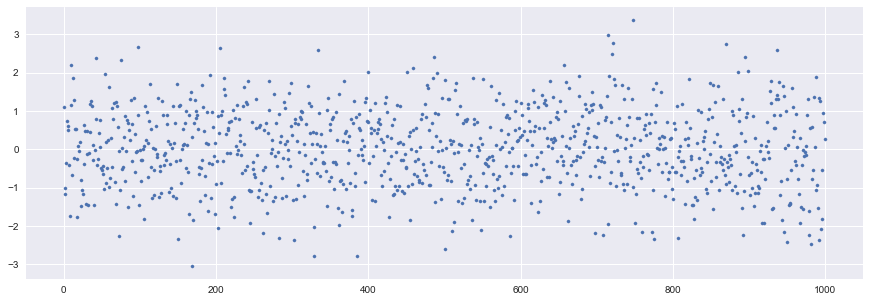

In [120]:
s = np.random.randn(1000)
plt.scatter(range(len(s)), s, s = 10);

Mostremos su función de autocorrelación:

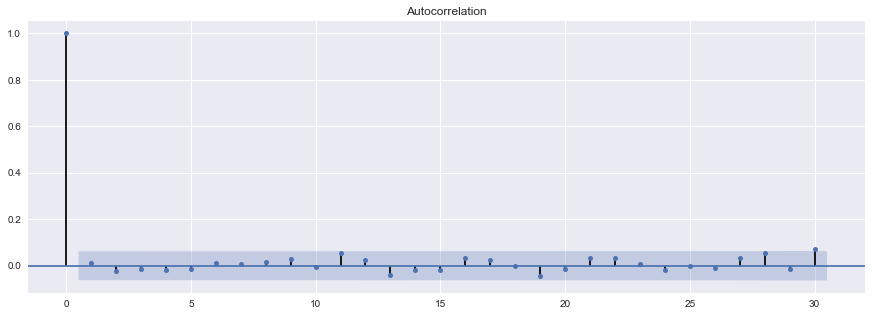

In [121]:
plot_acf(s);

# Modelos ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## El modelo Autorregresivo (AR)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Los modelos auto-regresivos (o modelos AR) presuponen que un valor de una serie temporal depende del valor o de los valores anteriores:

<strong>R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub></strong>

El valor de p (es decir, el número de lags -o valores anteriores- considerados) define el orden del modelo. El modelo más sencillo es el de orden 1, o AR(1):

AR(1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + &epsilon;<sub>t</sub>

AR(2): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + &epsilon;<sub>t</sub>

AR(p): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + ... + a<sub>p</sub>.R<sub>t-p</sub> + &epsilon;<sub>t</sub>

El modelo AR(1) es también llamado <i>Cadena de Markov</i>.

&epsilon;<sub>t</sub> es ruido blanco: valores aleatorios e independientes de los demás &epsilon;, serie con media y varianza constante y autocorrelación nula para todos los lags.

Estos valores también suelen denominarse *shocks* en la literatura en inglés.

Creemos entonces un modelo AR para aproximar los valores de candy. Aun cuando statsmodels ofrece una clase para este tipo de modelos (la clase AR), vamos a utilizar una súper clase de ésta: SARIMAX (de esta forma evitamos tener que aprender diferentes métodos, atributos, etc.).

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [123]:
model = SARIMAX(candy, order = (2, 0, 0)).fit()  # modelo AR de orden 2 entrenado a partir de los datos de candy

Podemos acceder al resumen del entrenamiento con el método .summary():

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1965.427
Date:                Thu, 27 Feb 2020   AIC                           3936.854
Time:                        13:37:16   BIC                           3949.773
Sample:                    01-31-1972   HQIC                          3941.904
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2575      0.056     22.553      0.000       1.148       1.367
ar.L2         -0.2624      0.057     -4.638      0.000      -0.373      -0.152
sigma2        75.6479      3.187     23.739      0.000      69.402      81.894
===================================================================================
Ljung-Box (Q):                     1697.19   Jarque-Bera (JB):               125.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En la parte superior del resumen se muestra el orden del modelo creado (*Model*) y el número de observaciones (*No. Observations*). También encontramos los valores AIC y BIC:

### AIC y BIC
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

AIC y BIC nos permiten estimar la corrección del modelo:

**AIC** (**Akaike Information Criterion**) es una métrica que nos indica cuán bueno o malo es nuestro modelo. Cuanto mejores predicciones realice un modelo, menos AIC tendrá. Aun cuando frecuentemente un mayor orden en el modelo puede suponer mejores predicciones, lo normal es que sea a costa de sobreentrenarlo, por lo que AIC impone una penalización a los modelos de alto orden (es decir, a aquellos con muchos parámetros).

**BIC** (**Bayesian Information Criterion**) es una métrica semejante a AIC: cuanto mejor sea el modelo, menor BIC obtendrá. BIC también penaliza los modelos más complejos, y lo hace más que AIC, por lo que BIC tenderá a sugerir el uso de modelos más simples que AIC. En la mayor parte de los casos el modelo sugerido será el mismo pero, cuando no lo sea, deberemos escoger:

* Si buscamos el mejor modelo predictivo, AIC será más aconsejable.
* Si, por el contrario, buscamos un modelo que explique de forma más sencilla nuestros datos, nos decantaremos por BIC.

Una vez entrenado el modelo, podemos extraer los valores de AIC y BIC mediante los atributos homónimos del modelo:

In [125]:
print("AIC: {:.4f}".format(model.aic))
print("BIC: {:.4f}".format(model.bic))

AIC: 3936.8544
BIC: 3949.7732


<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Compara los valores de AIC y BIC para los modelos AR de orden 1 y 2 aplicados a candy.</div>
</div>

In [126]:
model_1p = SARIMAX(candy, order = (1, 0, 0)).fit()
model_2p = SARIMAX(candy, order = (2, 0, 0)).fit()

In [127]:
print("Orden 1:")
print("AIC: {:.4f}".format(model_1p.aic))
print("BIC: {:.4f}".format(model_1p.bic))
print("\nOrden 2:")
print("AIC: {:.4f}".format(model_2p.aic))
print("BIC: {:.4f}".format(model_2p.bic))

Orden 1:
AIC: 3973.6798
BIC: 3982.2923

Orden 2:
AIC: 3936.8544
BIC: 3949.7732


Continuando con el resumen del modelo, una vez entrenado podemos acceder a los parámetros del modelo con el atributo params:

In [128]:
model.params

ar.L1      1.257536
ar.L2     -0.262390
sigma2    75.647943
dtype: float64

El siguiente bloque de información muestra los parámetros del modelo entrenado: Hemos creado un modelo AR(2), de forma que se muestran los dos coeficientes (Li hace referencia al *lag* i-ésimo).

La segunda columna muestra la desviación estándar de los coeficientes, lo que representa el margen de confianza en éstos.

### Predicción
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Podemos realizar una predicción para los n siguientes lags con el método .get_forecast(steps = n):

In [129]:
prediction = model.get_forecast(steps = 12)

El resultado de la predicción es un objeto que incluye información sobre el valor medio y el intervalo de confianza:

In [130]:
prediction

In [131]:
prediction.conf_int().head()

,lower production,upper production
2017-09,99.471696,133.565593
2017-10,89.208997,143.986735
2017-11,80.616458,151.488954
2017-12,73.289381,157.403342
2018-01,66.863888,162.338415


In [132]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [133]:
prediction.predicted_mean.head()

2017-09    116.518645
2017-10    116.597866
2017-11    116.052706
2017-12    115.346361
2018-01    114.601152
Freq: M, dtype: float64

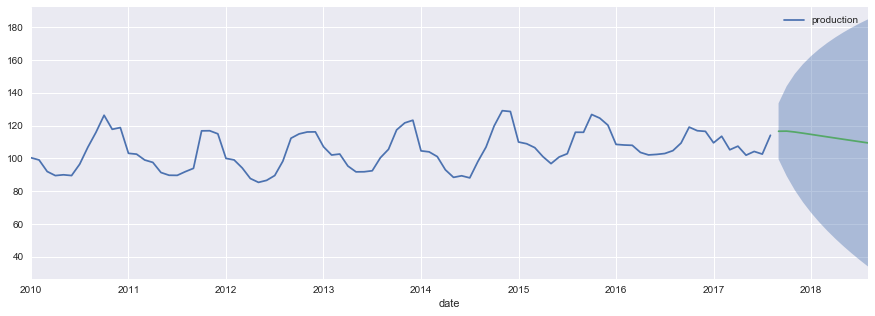

In [134]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

También podemos generar la predicción sin el intervalo de confianza con el método .predict()

In [135]:
model.predict(start = len(candy), end = len(candy) + 12)

2017-09    116.518645
2017-10    116.597866
2017-11    116.052706
2017-12    115.346361
2018-01    114.601152
2018-02    113.849361
2018-03    113.099493
2018-04    112.353769
2018-05    111.612753
2018-06    110.876568
2018-07    110.145224
2018-08    109.418700
2018-09    108.696967
Freq: M, dtype: float64

Podemos acceder a los valores predichos para los datos en los que el modelo se ha entreado con el atributo .fittedvalues:

In [136]:
model.fittedvalues

date
1972-01      0.000000
1972-02     85.365009
1972-03     67.830866
1972-04     64.181334
1972-05     63.868445
              ...    
2017-04    102.551244
2017-05    107.485745
2017-06     99.980975
2017-07    104.295011
2017-08    101.664116
Freq: M, Length: 548, dtype: float64

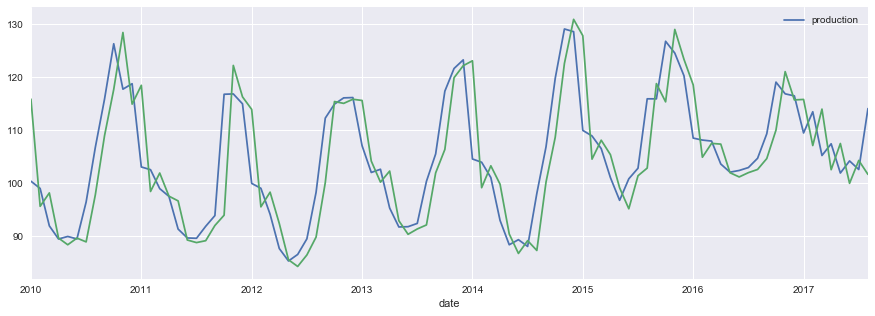

In [137]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
model.fittedvalues.truncate(before = "2010").plot(ax = ax)
plt.show()

Es posible calcular el error cuadrático medio -por ejemplo-:

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error(candy.production, model.fittedvalues)

88.97417983752257

## El modelo Moving Average (MA)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Los modelos "moving-average" (o modelos MA) consideran que un valor de una serie temporal depende de los valores &epsilon; de los valores anteriores:

<strong>R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub></strong>

Nuevamente, el valor de q (número de lags o valores anteriores a usar) define el orden del modelo:

MA(1): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

MA(2): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + &epsilon;<sub>t</sub>

MA(q): R<sub>t</sub> = m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub>

In [140]:
model = SARIMAX(candy, order = (0, 0, 3)).fit()  # Modelo MA de orden 3 entrenado a partir de los datos de candy

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [141]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(0, 0, 3)   Log Likelihood               -2719.637
Date:                Thu, 27 Feb 2020   AIC                           5447.274
Time:                        13:37:17   BIC                           5464.499
Sample:                    01-31-1972   HQIC                          5454.007
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.7975      0.070     25.708      0.000       1.660       1.935
ma.L2          1.2426      0.115     10.787      0.000       1.017       1.468
ma.L3          0.1481      0.069      2.141      0.032       0.013       0.284
sigma2      1173.1163     90.314     12.989      0.000     996.103    1350.129
===================================================================================
Ljung-Box (Q):                     3510.60   Jarque-Bera (JB):                 9.49
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.16   Skew:                             0.08
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Veamos la predicción:

In [142]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

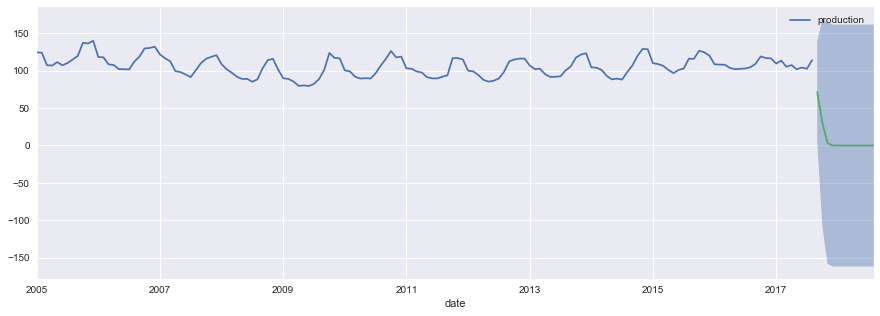

In [143]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## El modelo ARMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El modelo ARMA (modelo auto-regresivo moving average) es una combinación de los modelos AR y MA:

ARMA = AR + MA

Los valores de la serie temporal se estiman a partir de los valores anteriores de la serie (modelo AR) y de los epsilon anteriores (modelo MA). El orden de un modelo ARMA está formado por el orden de los modelos AR y MA que lo componen:

ARMA(1, 1): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMA(p, q): R<sub>t</sub> = a<sub>1</sub>.R<sub>t-1</sub> + a<sub>2</sub>.R<sub>t-2</sub> + a<sub>p</sub>.R<sub>t-p</sub> + R<sub>t</sub> + m<sub>1</sub>.&epsilon;<sub>t-1</sub> + m<sub>2</sub>.&epsilon;<sub>t-2</sub> + ... + m<sub>q</sub>.&epsilon;<sub>t-q</sub> + &epsilon;<sub>t</sub>

In [144]:
model = SARIMAX(candy, order = (2, 0, 3)).fit()

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [145]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  548
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1915.281
Date:                Thu, 27 Feb 2020   AIC                           3842.562
Time:                        13:37:17   BIC                           3868.400
Sample:                    01-31-1972   HQIC                          3852.661
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0008      0.001      0.542      0.588      -0.002       0.004
ar.L2          0.9992      0.001    680.374      0.000       0.996       1.002
ma.L1          1.3980      0.047     30.048      0.000       1.307       1.489
ma.L2          0.5850      0.070      8.301      0.000       0.447       0.723
ma.L3          0.1775      0.045      3.929      0.000       0.089       0.266
sigma2        61.8787      3.455     17.909      0.000      55.107      68.651
===================================================================================
Ljung-Box (Q):                     1193.35   Jarque-Bera (JB):                56.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

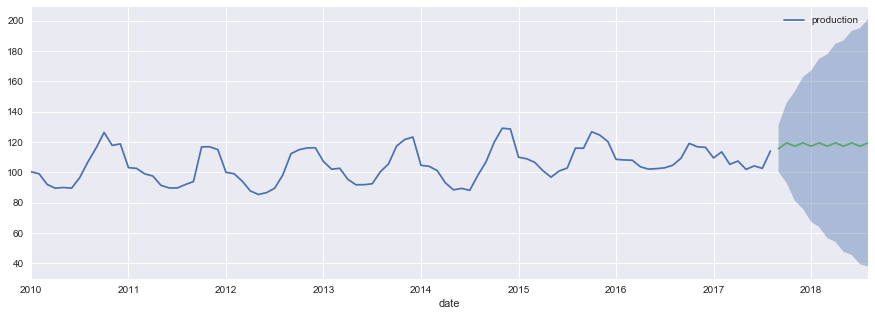

In [147]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

## Series estacionarias (stationary series)
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El modelado de series temporales es posible, en ocasiones, solo si las características de los valores en estudio no cambian. Por ejemplo, si el valor medio de una serie temporal depende del tiempo, va a ser difícil desarrollar un modelo predictivo fiable.

Es por ello que la mayor parte de los modelos predictivos dan por supuesto que la serie a analizar cumple ciertas condiciones matemáticas que solemos resumir diciendo que la serie es estacionaria.

Podemos describir el concepto de serie estacionaria diciendo que es aquella que mantiene sus propiedades estadísticas constantes a lo largo del tiempo. Concretamente:

* Debe tener una media constante: no puede tener una tendencia (ni positiva ni negativa).
* Debe tener una varianza constante: la desviación media (distancia de cada valor a la media de la serie) no puede cambiar en función del tiempo.
* La autocorrelación debe ser constante para todos los lags, lo que implica, por ejemplo, que la serie no puede ser periódica. Es decir, la relación de un dato con sus vecinos debe ser siempre semejante.

Esta definición recuerda a la de ruido blanco (aunque en aquel caso imponíamos que la autocorrelación tenía que ser nula). De hecho, el ruido blanco es siempre estacionario.

Por ejemplo, obsérvense las siguientes series temporales:

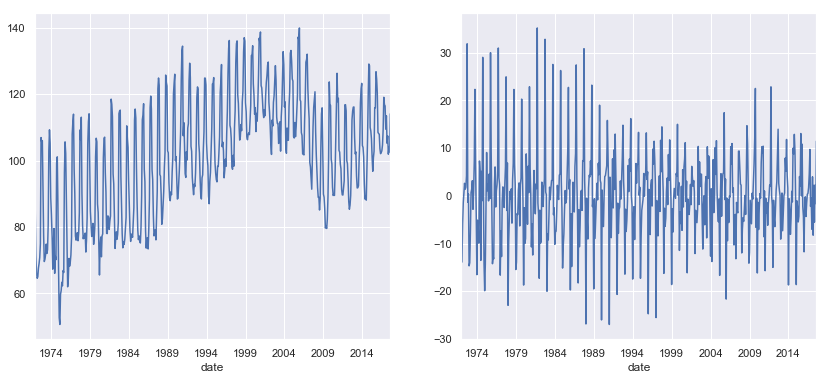

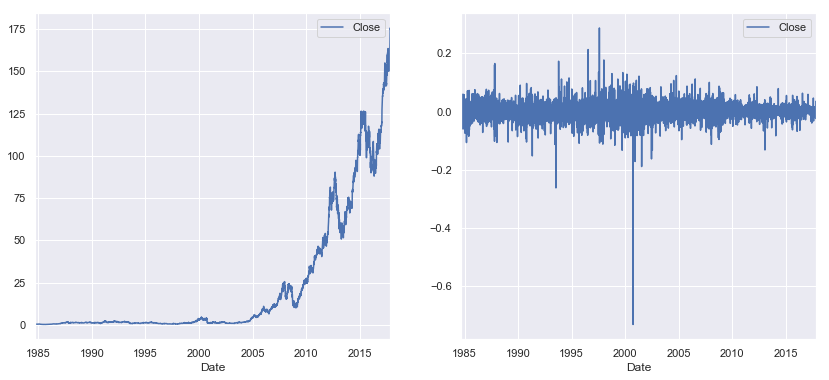

Las imágenes de la izquierda no son estacionarias, pues muestras claramente una tendencia, valores medio y varianzas que cambian con el tiempo, y una estacionalidad.

Desafortunadamente, la mayor parte de los datasets que se generan son de datos no estacionales. ¿Quiere esto decir que no les podemos aplicar modelos predictivos? Pues en parte no, y en parte sí... Efectivamente, no podemos aplicar los modelos predictivos habituales a este tipo de datasets. Afortunadamente, siempre podemos aplicar pequeñas transformaciones a dichos datos para convertirlos en series estacionarias.

### El test de Dicky-Fuller Aumentado
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Un **test de hipótesis** es un procedimiento para juzgar si una propiedad estadística que suponemos cierta en una población es coherente con las observaciones realizadas.

La hipótesis a analizar se denomina **hipótesis nula** o **H<sub>0</sub>**. Esta hipótesis no se puede probar, pero se puede descargar si la probabilidad del estadístico en estudio (el llamado p-value) no supera el nivel de significancia arbitrario impuesto.

El test de Dicky-Fuller aumentado es el más usado para comprobar si una serie temporal es o no estacionaria. La hipótesis nula de este test es que la serie temporal no es estacionaria debido a su tendencia.

La librería statsmodels implementa este test:

In [148]:
from statsmodels.tsa.stattools import adfuller

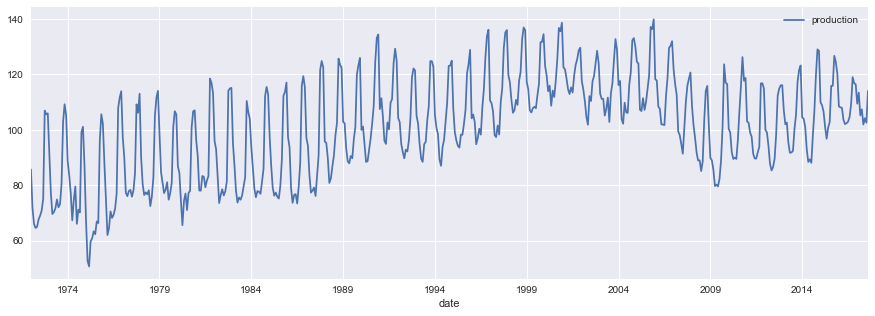

In [149]:
candy.plot();

In [150]:
adfuller(candy.production)

(-1.8870498112252763,
 0.3381775973004313,
 14,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3012.789090974259)

Este test busca determinar la existencia de o no de raíces unitarias en la serie (la hipótesis nula de este test es que existe una raíz unitaria, es decir, que la serie no es estacionaria).

El primer elemento es la estadística del test: cuanto más negativo, más probablemente la serie será estacionaria.

El segundo elemento es el p-value: la probabilidad del estadístico en estudio. Si es menor que 0.05, podemos rechazar la hipótesis nula y asumir que la serie temporal es estacionaria.

Los últimos valores son los valores críticos: los p-values para diferentes intervalos de confianza.

En cualquier caso, siempre es conveniente realizar un análisis visual de los datos, mostrándolos en una gráfica.

En este caso no podemos descartar la hipóstesis nula, pero acabamos de comentar que podemos transformar nuestros datos para hacerlos estacionarios. Por ejemplo, veamos el efecto de restar a la serie candy sus mismos valores después de desplazarlos un lag:

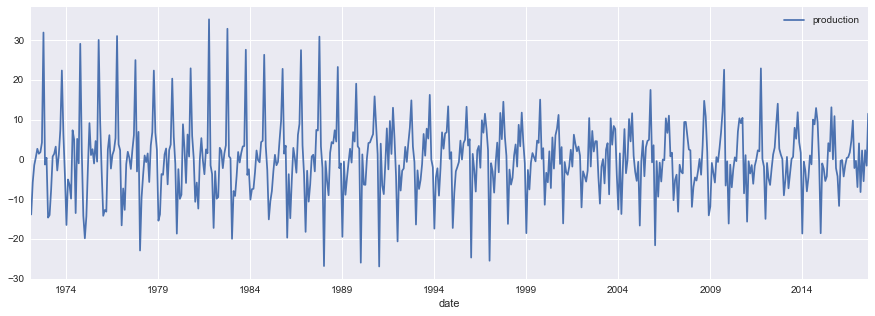

In [151]:
candy_diff = candy - candy.shift(1)
candy_diff.dropna(inplace = True)
candy_diff.plot();

Ejecutemos el test de Dicky-Fuller sobre este resultado:

In [152]:
adfuller(candy_diff.production)

(-6.119511504715748,
 8.92558420357052e-08,
 13,
 533,
 {'1%': -3.442678467240966,
  '5%': -2.8669778698997543,
  '10%': -2.5696661916864083},
 3009.6697664167204)

La serie ahora pasa el test...

### Transformaciones
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

###### Diferencia

Comprobamos que calculando la diferencia de una serie consigo misma tras desplazarla un lag mejoramos su estacionariedad. En ocasiones resultará necesario aplicar la diferencia más de una vez (para poder aplicar el modelo ARIMA, como veremos más adelante). En cualquier caso deberemos evitar realizar este proceso más veces de lo estrictamente necesario.

### Porcentaje de cambio

Pero no es la única transformación posible. Otra es calcular el porcentaje que esos cambios suponen en porcentaje:

In [153]:
air_passengers = pd.read_csv("AirPassengers.csv", parse_dates = ["Month"], index_col = "Month")
air_passengers.rename({"#Passengers": "passengers"}, inplace = True, axis = 1)
air_passengers.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


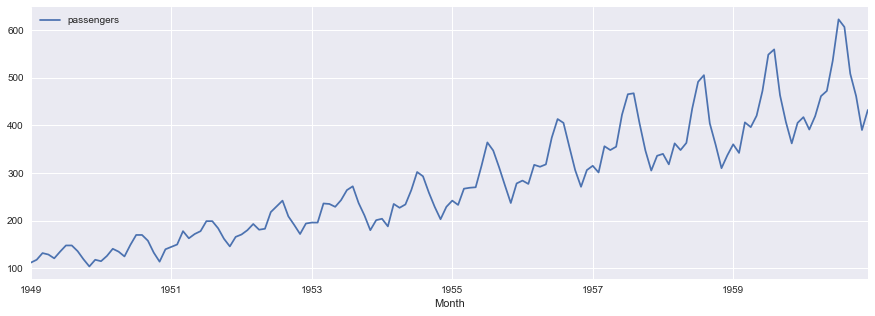

In [154]:
air_passengers.plot();

Pasamos el test de Dicky-Fuller aumentado:

In [155]:
adfuller(air_passengers.passengers)

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [156]:
air_passengers_pct = air_passengers.pct_change().dropna()
air_passengers_pct.head()

,passengers
Month,
1949-02-01,0.053571
1949-03-01,0.118644
1949-04-01,-0.022727
1949-05-01,-0.062016
1949-06-01,0.115702


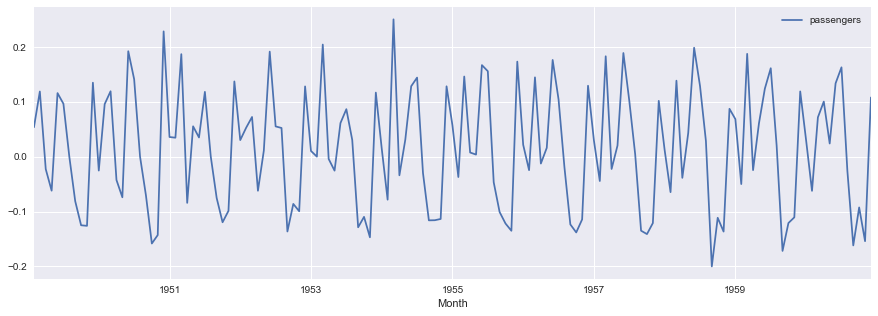

In [157]:
air_passengers_pct.plot();

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Pasa a esta serie el test de Dicky-Fuller aumentado ¿es estacionaria?</div>
</div>

In [158]:
adfuller(air_passengers_pct.passengers)

(-2.926108907545383,
 0.042395039725239676,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -425.9255544019345)

Según el p-value obtenido, estamos cerca del nivel de significancia. Podríamos descartar la hipótesis nula con ciertas reservas.

###### Logaritmo

Otra transformación práctica es la aplicación de una función logaritmo a los valores de la serie:

In [159]:
air_passengers_log = np.log(air_passengers)
air_passengers_log.head()

,passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


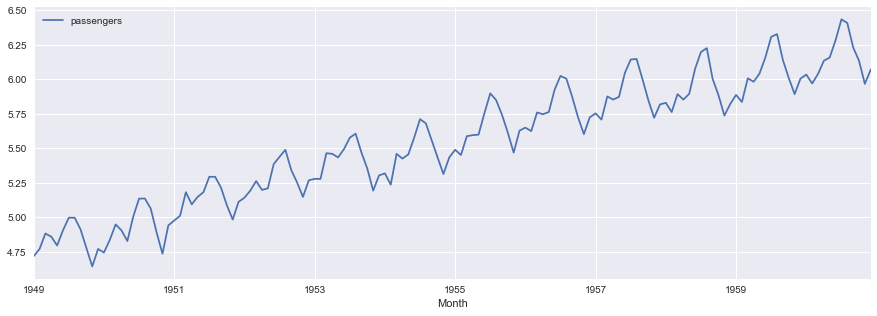

In [160]:
air_passengers_log.plot();

In [161]:
adfuller(air_passengers_log.passengers)

(-1.717017089106961,
 0.4223667747703911,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

###### Otras funciones

Otras transformaciones puedes ser:
* Calcular la raíz cuadrada de los datos: np.sqrt(df)
* Considerar el cambio proporcional: df.shift(1) / df
* El llamado log-return: np.log(df / df.shift(1))

###### Funciones combinadas

Por supuesto, podemos combinar estas funciones de forma escalonada:

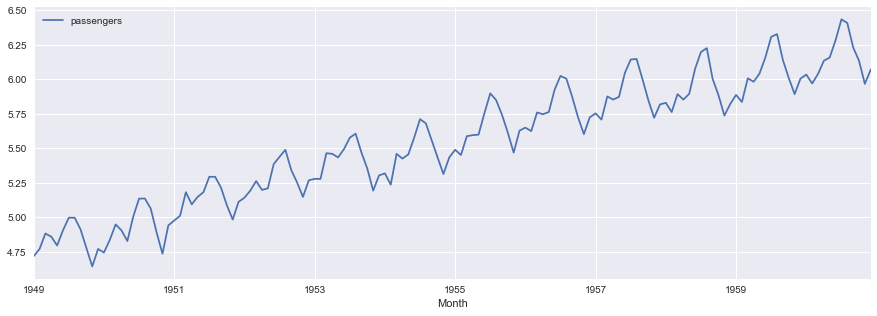

In [162]:
air_passengers_log = np.log(air_passengers)
air_passengers_log.plot();

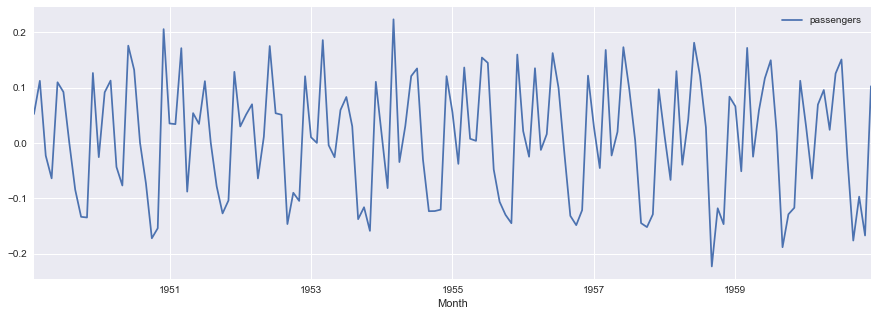

In [163]:
air_passengers_diff = (air_passengers_log - air_passengers_log.shift(1)).dropna()
air_passengers_diff.dropna(inplace = True)
air_passengers_diff.plot();

In [164]:
adfuller(air_passengers_diff.passengers)

(-2.7171305983881227,
 0.07112054815086045,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

### Integración
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Hemos visto entonces que candy_diff pasa el test de Dicky-Fuller Aumentado.

In [165]:
candy_diff.head()

,production
date,
1972-02,-13.8745
1972-03,-5.7971
1972-04,-1.4584
1972-05,0.4455
1972-06,2.6367


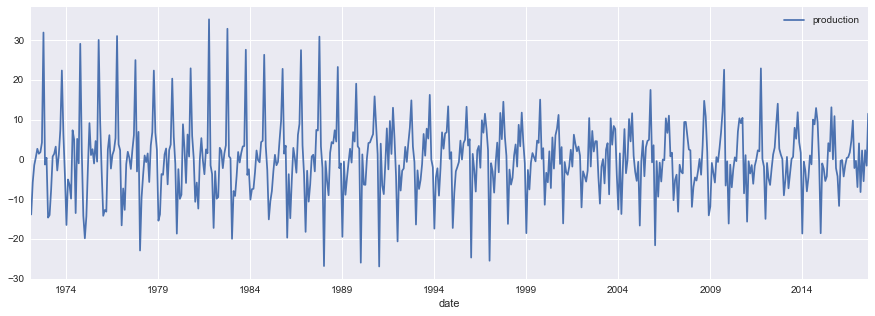

In [166]:
candy_diff.plot();

Lógicamente, si ahora aplicásemos un modelo ARMA, a la predicción resultante deberíamos aplicar el operador inverso que, en el caso de la diferencia, se denomina "integración":

In [167]:
candy_diff.head()

,production
date,
1972-02,-13.8745
1972-03,-5.7971
1972-04,-1.4584
1972-05,0.4455
1972-06,2.6367


In [168]:
model = SARIMAX(candy_diff, order = (3, 0, 2)).fit()

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  547
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1814.305
Date:                Thu, 27 Feb 2020   AIC                           3640.610
Time:                        13:37:20   BIC                           3666.436
Sample:                    02-29-1972   HQIC                          3650.705
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5388      0.051     30.198      0.000       1.439       1.639
ar.L2         -0.6910      0.085     -8.101      0.000      -0.858      -0.524
ar.L3         -0.1519      0.050     -3.042      0.002      -0.250      -0.054
ma.L1         -1.7722      0.023    -75.635      0.000      -1.818      -1.726
ma.L2          0.8863      0.022     39.866      0.000       0.843       0.930
sigma2        44.1716      2.283     19.346      0.000      39.697      48.647
===================================================================================
Ljung-Box (Q):                     1492.36   Jarque-Bera (JB):               117.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [171]:
prediction.predicted_mean.head()

2017-09    2.041761
2017-10    2.338034
2017-11    0.443588
2017-12   -1.243137
2018-01   -2.574601
Freq: M, dtype: float64

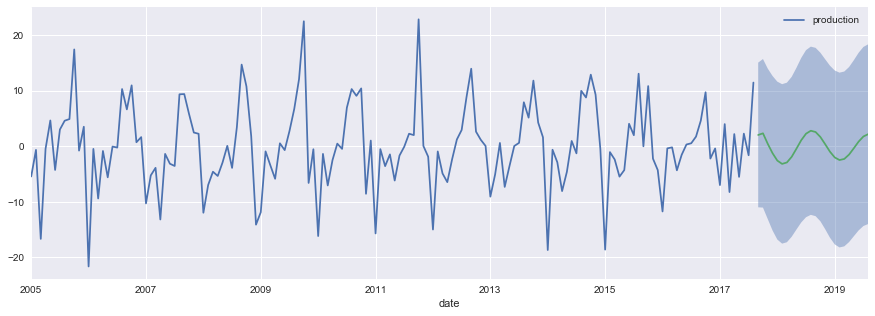

In [172]:
fig, ax = plt.subplots()
candy_diff.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [173]:
real_prediction = np.cumsum(prediction.predicted_mean) + candy.iloc[-1].values

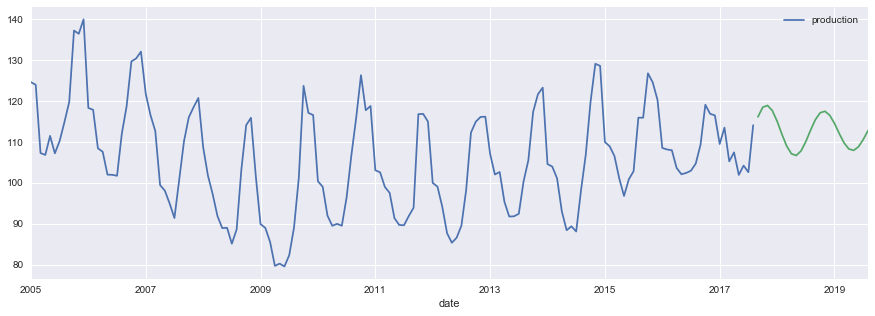

In [174]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
real_prediction.plot(ax = ax)
plt.show()

## Perfiles de los datos AR y MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Sabemos cómo crear y entrenar un modelo ARMA pero ¿cómo sabemos si se trata de un modelo AR, MA o ARMA? Veamos el perfil de los datos de estos tipos. statsmodels incluye una función que nos permite generar datos con estos perfiles:

In [175]:
from statsmodels.tsa.arima_process import arma_generate_sample

### Datos AR
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [176]:
sample = arma_generate_sample([1, -0.8], [1, 0], 1000) # (coeficientes AR, coeficientes MA, número de muestras)

Los conjuntos de coeficientes para los componentes AR y MA siempre deben incluir un 1 al principio (representando la constante), y los coeficientes para AR se incluirán con valor negativo. Es decir, para crear un modelo AR(1) con un coeficiente de 0.8 deberá incluirse como primer argumento [1, -0.8]

In [177]:
sample[:20]

array([-1.06409435, -1.69673178,  0.33081329,  1.98764553,  1.67216881,
       -0.06393811, -0.72557056, -0.25905712, -1.05656377, -1.17022762,
        0.13747319, -0.81449668, -0.92344412,  1.32167169,  0.99928101,
        1.74771746,  0.77655072, -0.29845825, -0.64864939, -0.67144216])

Mostremos las funciones de autocorrelación y de autocorrelación parcial:

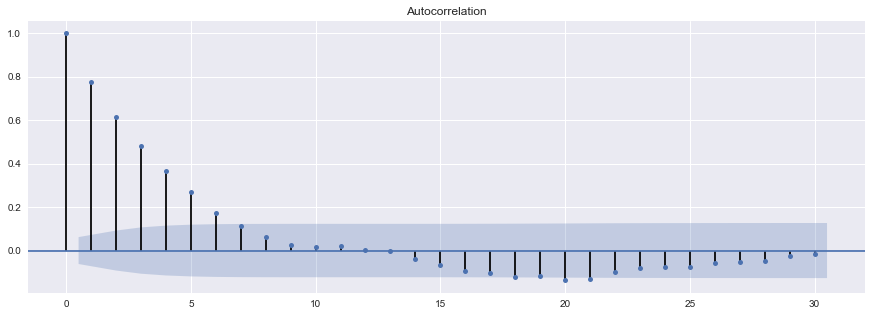

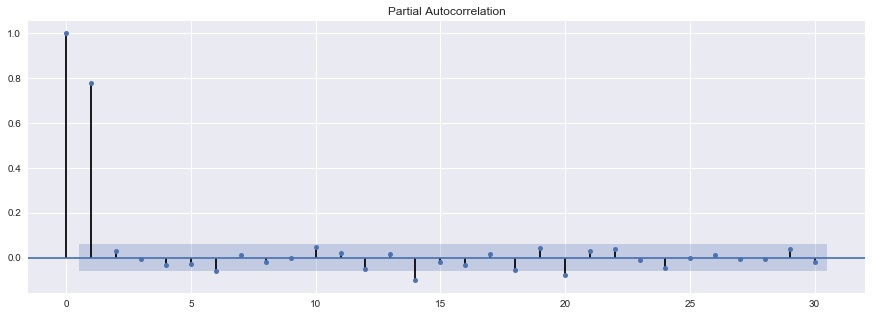

In [178]:
plot_acf(sample)
plot_pacf(sample)
plt.show()

En datos modelables mediante un modelo autorregresivo veremos siempre perfiles semejantes a éste: en la función de autocorrelación parcial tantos valores significativos como orden del modelo (1 en este caso) -no contamos aquí el valor 1 devuelto por el primer lag-, y una función de autocorrelación que tiende a tomar valores limitados entre dos valores.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo AR(2)</div>
</div>

In [179]:
sample = arma_generate_sample([1, -0.8, 0.6], [1, 0], 1000)

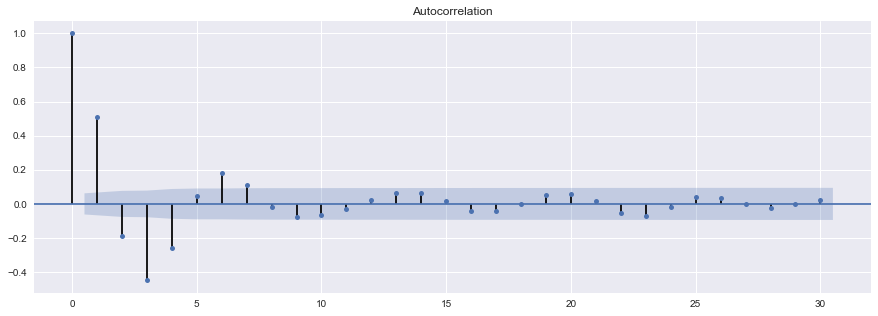

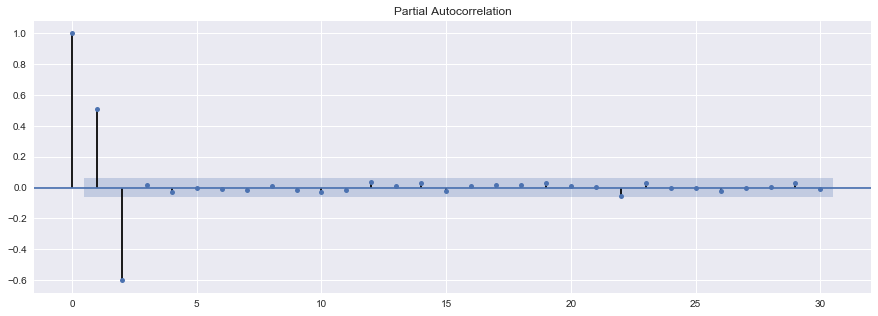

In [180]:
plot_acf(sample)
plot_pacf(sample)
plt.show()

### Datos MA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Repitamos el mismo proceso con datos modelables según un modelo MA(1):

In [181]:
sample = arma_generate_sample([1, 0], [1, 0.8], 1000)

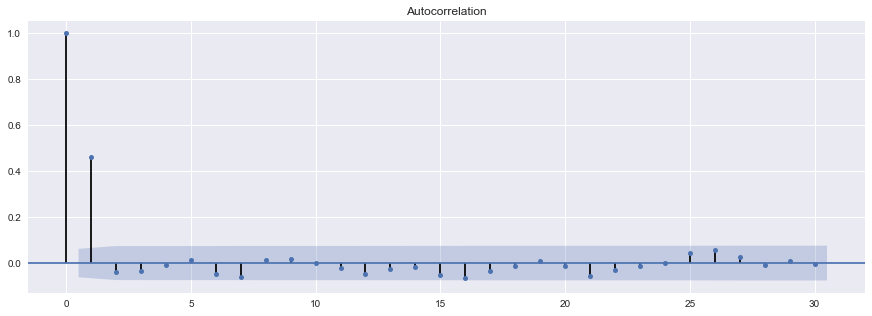

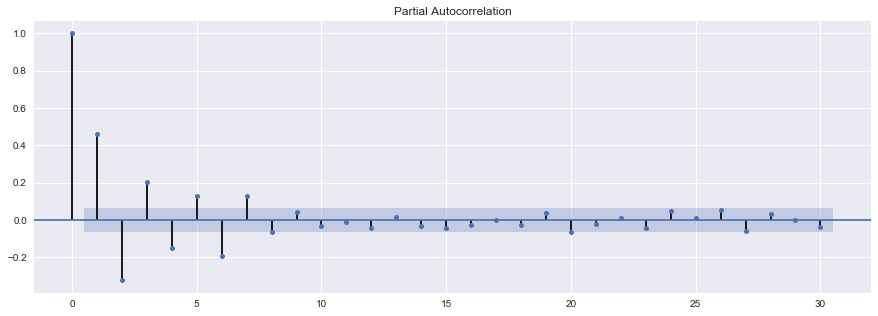

In [182]:
plot_acf(sample)
plot_pacf(sample)
plt.show()

Exactamente el perfil inverso: tantos valores significativos en la función de autocorrelación como orden del modelo, y función de autocorrelación tendiendo a tomar valores entre dos valores límite.

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Muestra la funciones de autocorrelación y de autocorrelación parcial para datos de un modelo MA(2)</div>
</div>

In [183]:
sample = arma_generate_sample([1, 0], [1, 0.8, -0.6], 1000)

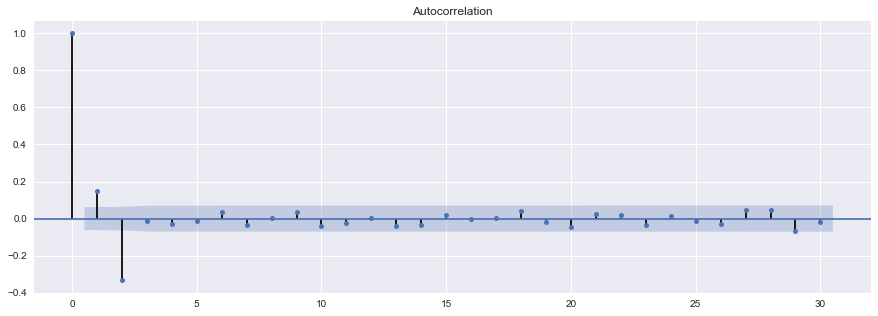

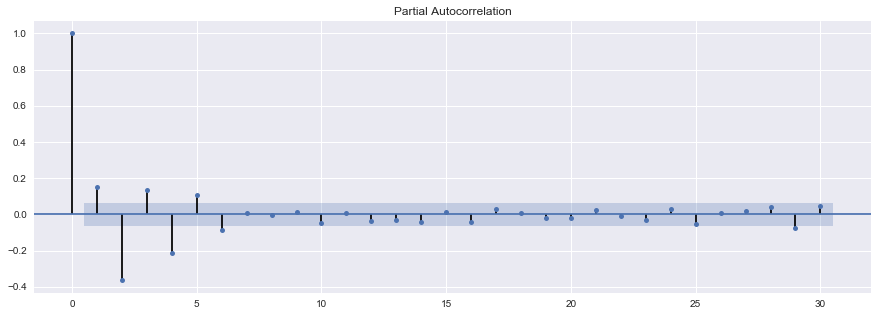

In [184]:
plot_acf(sample)
plot_pacf(sample)
plt.show()

## El modelo ARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

El proceso de diferenciación es tan frecuente, que el modelo ARIMA ya lo incluye:

ARIMA = Autoregressive Integrated Moving Average

In [185]:
model = SARIMAX(candy, order = (3, 1, 2)).fit() # El 1 indica que se va a diferenciar una vez

El parámetro order es una tupla (p, d, q) en la que p es el orden del modelo AR, q el orden del modelo MA y d el número de veces que se quiere diferenciar la serie.

In [186]:
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

In [187]:
prediction.predicted_mean.head()

2017-09    116.103020
2017-10    118.441229
2017-11    118.884890
2017-12    117.641779
2018-01    115.067129
Freq: M, dtype: float64

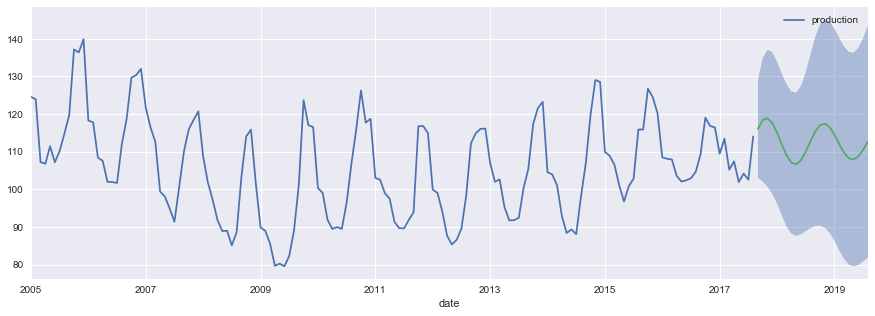

In [188]:
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

Eso sí, si hemos aplicado otras transformaciones además de la diferenciación, deberemos deshacerlas antes de obtener los valores reales.

## Búsqueda en bucle del mejor modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Podemos recurrir a bucles for anidados para buscar el modelo que mejor AIC o BIC devuelva, aunque no es la mejor opción:

In [189]:
best_aic = 999999
for p in range(4):
    for q in range(4):
        for d in range(2):
            try:
                model = SARIMAX(candy, order = (p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    print(p, d, q, model.aic, model.bic)
            except:
                pass

0 0 0 6628.977256015899 6633.283531302847
0 1 0 3960.6789418402914 3964.9833906427134
0 1 1 3934.649407427262 3943.258305032106
0 1 2 3887.9414434005257 3900.854789807792
0 1 3 3856.076777432049 3873.294572641737
1 1 3 3785.1236498120134 3806.645893824123


C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 3 3638.469435942224 3664.296128756756
3 1 3 3557.9603325632343 3588.091474180188


C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Descomposición de una serie estacional
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Recordemos la predicción realizada sobre candy:

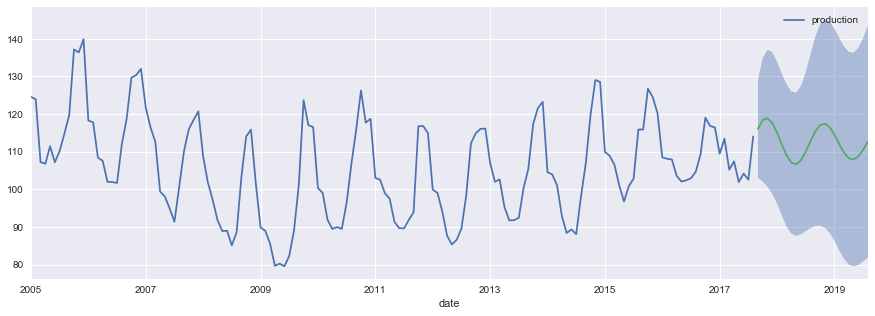

In [190]:
model = SARIMAX(candy, order = (3, 1, 2)).fit()
prediction = model.get_forecast(steps = 24)
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]
fig, ax = plt.subplots()
candy.truncate(before = "2005").plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

Aun cuando la predicción no es mala, podríamos mejorarla... ¿Estamos capturando toda la información de la serie incluyendo el carácter estacional de la misma? No.

Veámoslo de este modo: podemos descomponer la serie en tres bloques: trend, seasonal y resid, usando la función seasonal_decompose de statsmodels:

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose

Esta es nuestra serie original:

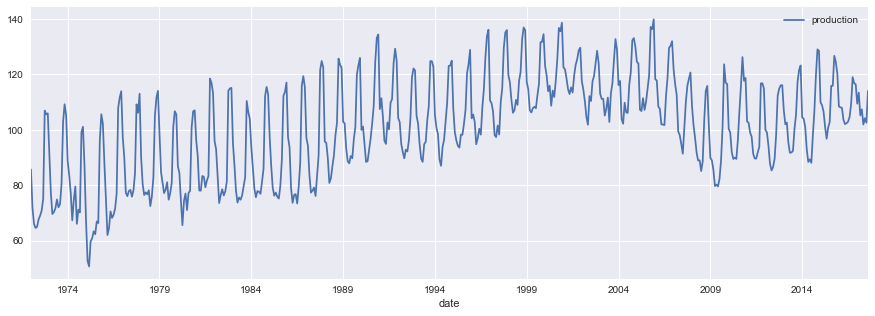

In [192]:
candy.plot();

In [193]:
decomposition = seasonal_decompose(x = candy.production.to_timestamp())

(Es necesario convertir los índices de candy en timestamps. Si no, recibimos un error)

Echemos un vistazo a cada bloque:

In [194]:
decomposition.trend.sample(5)

date
2009-01-01     92.602008
1990-04-01    103.784050
1988-02-01     97.708608
1988-01-01     96.493412
1981-12-01     91.325300
Name: trend, dtype: float64

In [195]:
decomposition.seasonal.sample(5)

date
1987-05-01   -11.911893
1994-03-01    -7.848780
1985-05-01   -11.911893
2011-08-01    -5.273063
1978-08-01    -5.273063
Name: seasonal, dtype: float64

In [196]:
decomposition.resid.sample(5)

date
1974-02-01    0.860767
1976-06-01   -2.898378
2006-07-01   -2.180652
2009-04-01   -0.855837
1998-01-01    0.415230
Name: resid, dtype: float64

Podemos mostrar en una gráfica estas curvas:

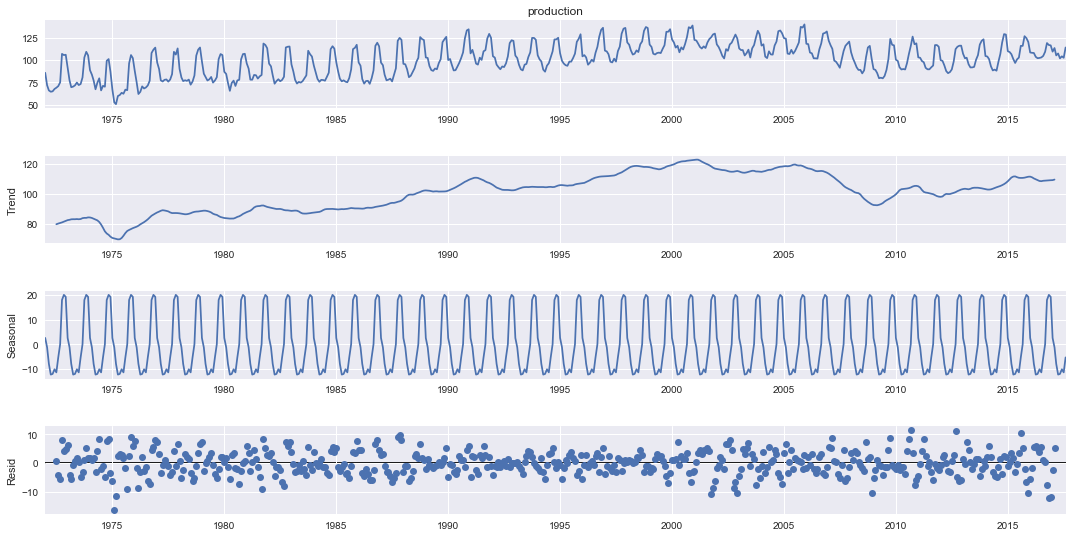

In [197]:
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

Con los modelos AR y MA estamos capturando bien el componente "Trend", pero no el estacional. Para ello sería necesario repetir dichos modelos pero considerando los lags correspondientes al período. Es decir, si el período es de 12 lags, haría falta una especie de modelo AR que, en lugar de basarse en el lag anterior, se basase en el lag -12...

## El modelo SARIMA
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Ahora que somos capaces de extraer la estacionalidad de una serie temporal, podemos utilizarla para mejorar nuestras predicciones. Para ello haremos uso del modelo SARIMA o "Seasonal ARIMA".

Entrenar un modelo SARIMA es como entrenar dos modelos ARIMA: uno para la parte estacional y otro para el resto de información. Es por ello que tendremos no uno, sino dos órdenes: (p, d, q) para el modelo ARIMA con los componentes no estacionales, y (P, D, Q)<sub>S</sub> para el modelo ARIMA con los componentes estacionales, siendo S el valor de la periodicidad (es decir, hacen falta 7 argumentos).

Comparemos las expresiones de los modelos ARIMA y SARIMA:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ARIMA(2, 0, 1):&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + a<sub>2</sub>y<sub>t-2</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

SARIMA(0, 0, 0)(2, 0, 1)<sub>7</sub>:&nbsp;&nbsp;&nbsp;y<sub>t</sub> = a<sub>7</sub>y<sub>t-7</sub> + a<sub>14</sub>y<sub>t-14</sub> + m<sub>7</sub>&epsilon;<sub>t-7</sub> + &epsilon;<sub>t</sub>

El modelo ARIMA anterior podrá capturar patrones de un período para el siguiente, pero no será capaz de captar la información relativa a la periodicidad. Por el contrario, el modelo SARIMA mostrado podrá captar los patrones estacionales, pero no los patrones que siguen los datos de un lag al siguiente.

Sumando ambos enfoques, seremos capaces de capturar todos los patrones existentes.

La clase SARIMAX soporta esta funcionalidad, siendo el modo de uso es muy semejante a lo ya visto:

model = SARIMAX(dataframe, order = (p, i, q), seasonal_order = (P, I, Q, S), trend = "c")

El parámetor trend nos sirve para indicarle al algoritmo que nuestros datos no están centrados en torno al valor cero.

In [198]:
model = SARIMAX(candy.to_timestamp(), order = (3, 1, 2), seasonal_order = (1, 1, 2, 12)).fit()

(convertimos el índice del dataframe a timestamp para evitar problemas con la función plot_diagnostics)

Nuevamente, deberemos asegurarnos de que el componente estacional es estacionario, para lo que deberemos recurrir igualmente a las transformaciones adecuadas.

In [199]:
prediction = model.get_forecast(steps = 12)

In [200]:
lower = prediction.conf_int()["lower production"]
upper = prediction.conf_int()["upper production"]

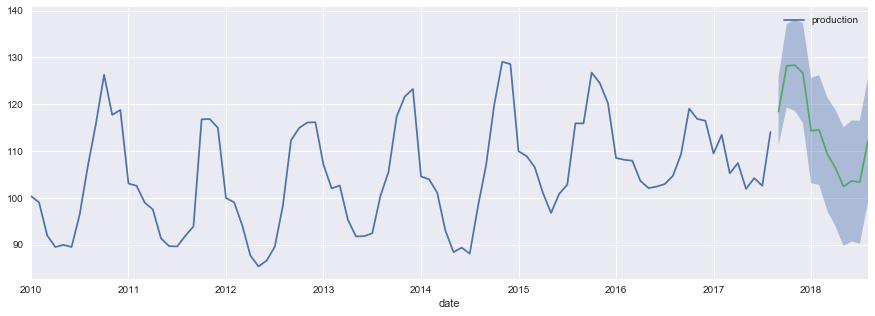

In [201]:
candy.truncate(before = "2010").plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

Los modelos ARIMA son entrenados usando el procedimiento de **Maximum Likelihood**, que busca aquellos parámetros que maximizan la probabilidad de que los datos de entrenamiento sean los que realmente son.

Vídeo recomendado:

https://youtu.be/XepXtl9YKwc

## Diagnóstico del modelo
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Una vez obtenido el modelo, podemos evaluar hasta qué punto se adapta adecuadamente a nuestros datos analizando los residuales, a los que tenemos acceso a través del atribuo .resid:

In [202]:
model.resid.head()

date
1972-01-01    85.694500
1972-02-01   -13.874292
1972-03-01    -5.797061
1972-04-01    -1.458528
1972-05-01     0.445557
Freq: MS, dtype: float64

En un modelo ideal, los residuales deberían ser ruido blanco gaussiano centrado en el valor cero, es decir, valores con correlación cero en todos los lags.

El método .plot_diagnostics() muestra cuatro gráficas que nos permiten realizar esta evaluación:

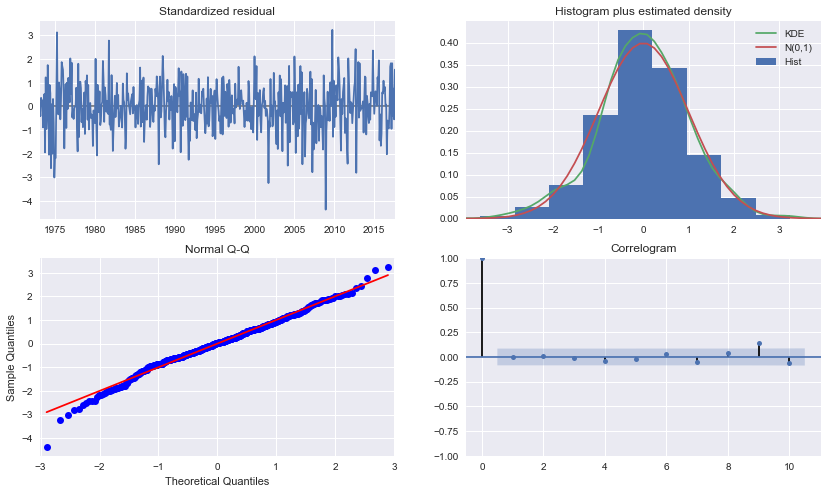

In [203]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()

La figura superior izquierda muestra los residuales one-step-ahead estandarizados. En un modelo adecuado, no deberá mostrarse ninguna estructura.

La figura superior derecha muestra la distribución de los residuales. La línea roja muestra una distribución normal y la verde el KDE (Kernel Density Estimation) de nuestros datos. Si el modelo es correcto, ambas curvas deberían ser muy próximas.

La imagen inferior izquierda muestra el gráfico Q-Q, que muestra la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución que se usa para la comparación. Si los residuales siguen una distribución normal, todos los puntos deberían estar situados sobre la línea roja, excepto, tal vez, algunos puntos en los extremos.

El último gráfico, en la parte inferior derecha, muestra un correlograma, que no es más que un gráfico de la función ACF de los residuales en lugar de los datos. Salvo el valor correspondiente al lag cero, todos los demás deberían ser cero (es decir, estar en el margen del 5% indicado por la línea azul). Si la autocorrelación no es nula para algún lag, es porque hay información en los datos que nuestro modelo no ha capturado.

Vídeo recomendado:

https://youtu.be/okjYjClSjOg

Parte de esta información se encuentra en el resumen del entrenamiento:

In [204]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         production   No. Observations:                  548
Model:             SARIMAX(3, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1466.780
Date:                            Thu, 27 Feb 2020   AIC                           2951.561
Time:                                    13:37:36   BIC                           2990.101
Sample:                                01-01-1972   HQIC                          2966.640
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2115      0.281      0.753      0.452      -0.339       0.762
ar.L2          0.3559      0.197      1.809      0.070      -0.030       0.741
ar.L3          0.1679      0.049      3.460      0.001       0.073       0.263
ma.L1         -0.5108      0.284     -1.801      0.072      -1.067       0.045
ma.L2         -0.4388      0.265     -1.653      0.098      -0.959       0.081
ar.S.L12      -0.0013      0.425     -0.003      0.998      -0.834       0.831
ma.S.L12      -0.6383      0.421     -1.516      0.130      -1.464       0.187
ma.S.L24      -0.1082      0.302     -0.359      0.720      -0.700       0.483
sigma2        13.8136      0.710     19.467      0.000      12.423      15.204
===================================================================================
Ljung-Box (Q):                       80.35   Jarque-Bera (JB):                26.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.25
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El test Ljung-Box parte de la hipótesis nula de que los residuales tienen una correlación nula para todos los lags. Prob(Q) es el p-value correspondiente.

El test Jarque-Bera (JB) parte de la hipótesis nula de que los residuales tienen distribución gaussiana, y Prob(JB) es su p-value.

## Automatización del cálculo de los órdenes óptimos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Aun cuando podemos seguir usando bucles para el cálculo de los órdenes óptimos, ahora que tenemos 7 órdenes para definir el modelo completo, este método resulta poco práctico. Afortunadamente la librería pmdarima nos ofrece una función que realiza este trabajo por nosotros, la función auto_arima.

In [205]:
import pmdarima as pm

C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\DANIEL\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html

In [206]:
model = pm.auto_arima(
    candy,
    m = 12,
    suppress_warnings=True
)

Esta función devuelve un objeto de la clase ARIMA, implementación del algoritmo de pmdarima.

In [207]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  548
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -1496.514
Date:                              Thu, 27 Feb 2020   AIC                           3013.028
Time:                                      13:39:11   BIC                           3056.072
Sample:                                           0   HQIC                          3029.853
                                              - 548                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.237      0.216      -0.000       0.001
ar.L1         -0.2649      0.025    -10.410      0.000      -0.315      -0.215
ar.L2          0.0125      0.029      0.427      0.669      -0.045       0.070
ar.L3          0.8498      0.023     37.622      0.000       0.806       0.894
ma.L1          0.0894      0.028      3.180      0.001       0.034       0.145
ma.L2         -0.1644      0.029     -5.597      0.000      -0.222      -0.107
ma.L3         -0.9206      0.031    -29.411      0.000      -0.982      -0.859
ar.S.L12       0.9865      0.004    281.311      0.000       0.980       0.993
ma.S.L12      -0.6524      0.039    -16.601      0.000      -0.729      -0.575
sigma2        13.1955      0.695     18.977      0.000      11.833      14.558
===================================================================================
Ljung-Box (Q):                       46.77   Jarque-Bera (JB):                71.55
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.33
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

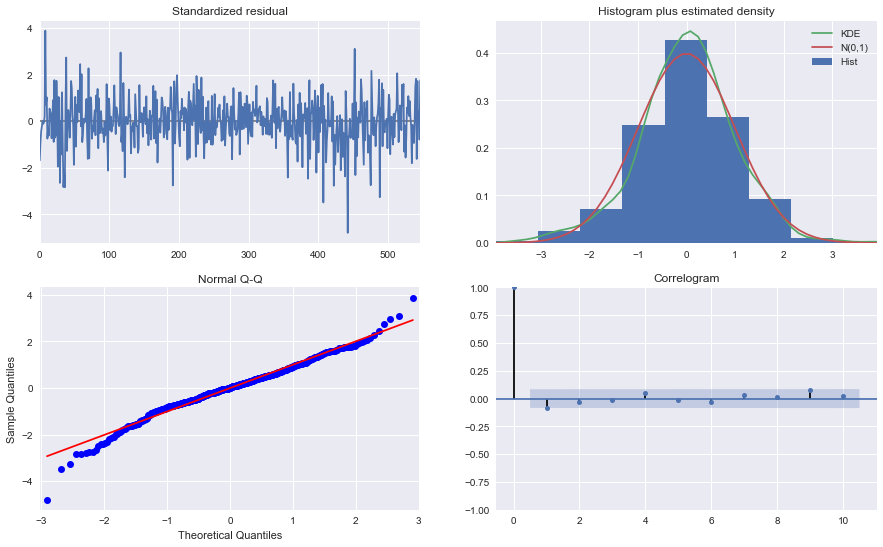

In [208]:
fig = model.plot_diagnostics()
fig.set_size_inches(15, 9)
plt.show()

In [209]:
forecast_mean, conf_int = model.predict(24, return_conf_int = True)

In [210]:
forecast_mean

array([118.40098253, 128.70910934, 127.1727619 , 125.98217988,
       114.26235422, 113.3524032 , 109.78437826, 106.77265026,
       101.90583507, 104.0103034 , 103.54975708, 110.95438961,
       116.38075218, 126.12631252, 125.23458794, 124.86284451,
       112.73594548, 112.52843685, 109.50108507, 105.92839661,
       101.87940747, 104.1677411 , 103.15577712, 111.25082034])

In [211]:
conf_int[:5]

array([[111.28125736, 125.5207077 ],
       [119.48128458, 137.9369341 ],
       [116.61960319, 137.72592061],
       [114.38892615, 137.57543362],
       [102.0580373 , 126.46667114]])

In [212]:
forecast_lower = conf_int[:, 0]
forecast_upper = conf_int[:, 1]

In [213]:
dates = pd.period_range(start = candy.index[-1], periods = 25, freq = "M")[1:]
dates

PeriodIndex(['2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08'],
            dtype='period[M]', freq='M')

In [214]:
forecast = pd.Series(forecast_mean, index = dates)

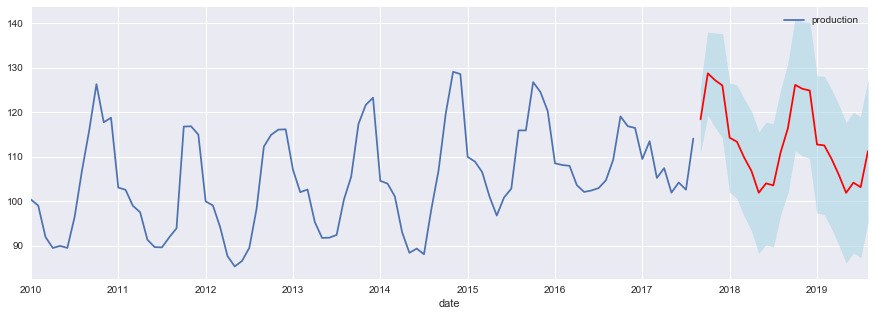

In [215]:
fig, ax = plt.subplots()
candy.truncate(before = "2010").plot(ax = ax)
forecast.plot(ax = ax, color = "red")
plt.fill_between(dates, forecast_lower, forecast_upper, color = "lightblue", alpha = 0.6)
plt.show()

## El modelo ARIMAX
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Una extensión del modelo ARIMA es el que incluye datos externos (exógenos) para crear el modelo. Por ejemplo, podemos tener una serie temporal en la que, para cada día del año, se indiquen las ventas realizadas. Pero podríamos incluir también información sobre qué día de la semana es cada uno de los días, o qué días son festivos.

El resultado es una especie de combinación entre un modelo ARIMA y una regresión lineal.

Si comparamos, por ejemplo, las ecuaciones que definen un modelo ARMA y otro ARMAX (en ambos casos de orden (1, 1)), tendríamos lo siguiente :

ARMA(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub>

ARMAX(1,1): y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + m<sub>1</sub>&epsilon;<sub>t-1</sub> + &epsilon;<sub>t</sub> + x<sub>1</sub>z<sub>t</sub>

El modelo ARIMAX se crea con la misma clase SARIMAX que hemos visto añadiendo el parámetro exog.

Por ejemplo, calculemos la evolución de las siguientes ventas añadiendo como información exógena si fue festivo o no, suponiendo orden (2, 0, 1) y orden estacional (1, 0, 0) y estacionalidad 7 (dejemos de lado si los datos son o no estacionarios):

In [216]:
ventas = pd.Series([10, 22, 15, 10, 25, 30, 18, 12, 21, 18, 11, 24, 28, 24])

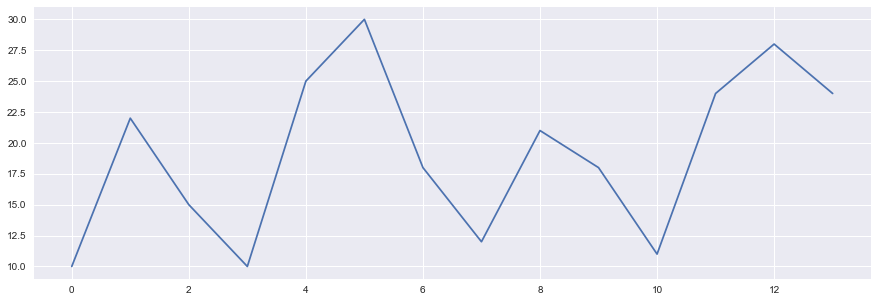

In [217]:
ventas.plot();

In [218]:
festivos = pd.Series([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [219]:
model = SARIMAX(ventas, order = (2, 0, 1), seasonal_order = (1, 0, 0, 7), exog = festivos).fit()

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [220]:
exog_data = np.array([0, 0]).reshape(-1, 1)
prediction = model.get_forecast(steps = 2, exog = exog_data)

In [221]:
prediction.predicted_mean

14    12.600457
15    21.117321
dtype: float64

In [222]:
prediction.conf_int()

,lower y,upper y
14,7.406860,17.794055
15,15.924648,26.309995


In [223]:
lower = prediction.conf_int()["lower y"]
upper = prediction.conf_int()["upper y"]

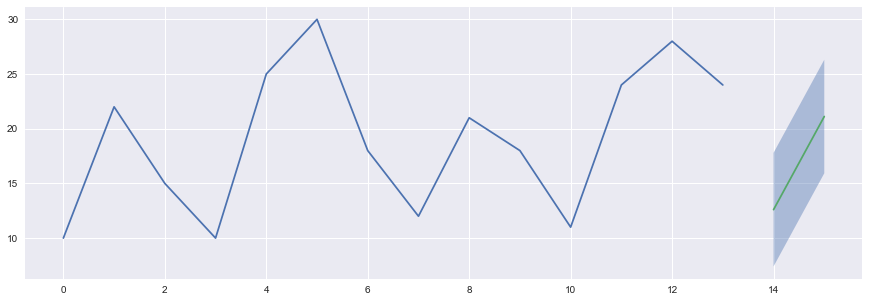

In [224]:
fig, ax = plt.subplots()
ventas.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

<div style="background:#0099cc;padding:20px;color:#ffffff">
<strong>EJERCICIO</strong>
<div>Repite el ejercicio suponiendo que ambos días van a ser festivos</div>
</div>

In [225]:
exog_data = np.array([1, 1]).reshape(-1, 1)
prediction = model.get_forecast(steps = 2, exog = exog_data)

In [226]:
prediction.predicted_mean

14    11.615653
15    20.132517
dtype: float64

In [227]:
prediction.conf_int()

,lower y,upper y
14,6.422056,16.80925
15,14.939844,25.32519


In [228]:
lower = prediction.conf_int()["lower y"]
upper = prediction.conf_int()["upper y"]

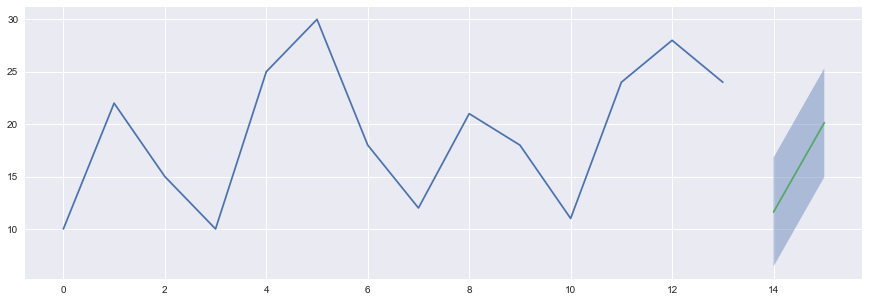

In [229]:
fig, ax = plt.subplots()
ventas.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()